<a href="https://colab.research.google.com/github/peterbabulik/QuantumWalker/blob/main/Quantum_Interference_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit qiskit-ibm-runtime qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.9/359.9 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 4.9 MB/s eta 0:00:00


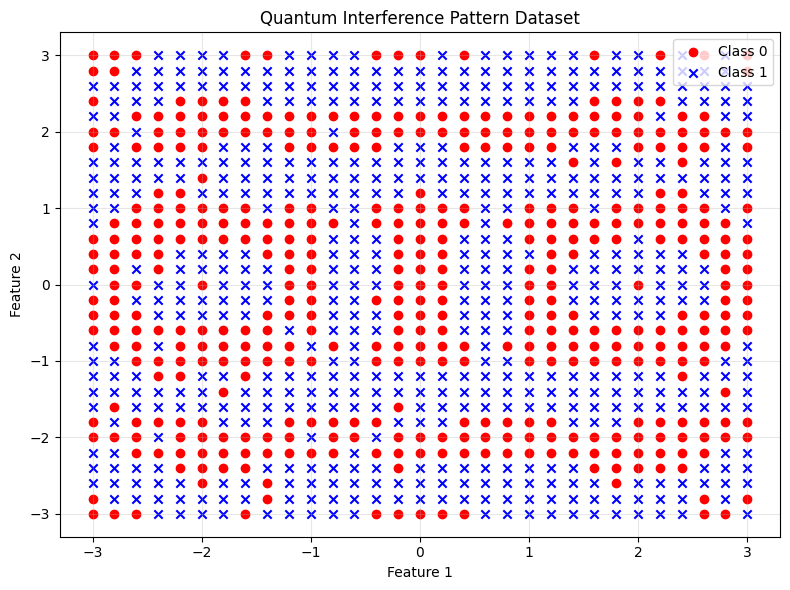

Best RBF SVM accuracy: 0.7855
Best parameters: C=100.0, gamma=1.0


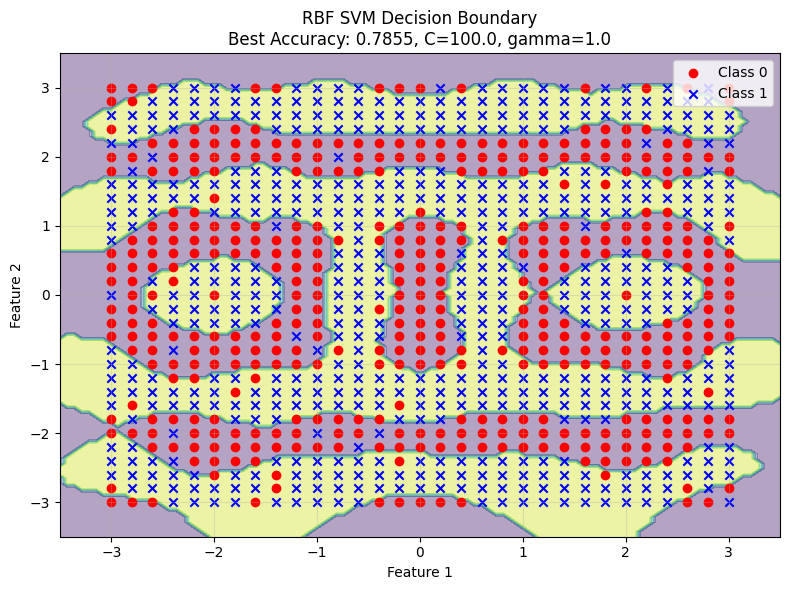

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_moons, make_circles

def plot_dataset(X, y, title):
    """Helper function to visualize 2D datasets"""
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='o', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='x', label='Class 1')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    return plt

def evaluate_rbf_svm(X, y, C_values=None, gamma_values=None):
    """Evaluate RBF SVM with different hyperparameters"""
    if C_values is None:
        C_values = [0.1, 1.0, 10.0, 100.0]
    if gamma_values is None:
        gamma_values = [0.001, 0.01, 0.1, 1.0, 10.0, 'scale', 'auto']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    best_score = 0
    best_params = {}

    for C in C_values:
        for gamma in gamma_values:
            svm = SVC(kernel='rbf', C=C, gamma=gamma)
            svm.fit(X_train, y_train)
            y_pred = svm.predict(X_test)
            score = accuracy_score(y_test, y_pred)

            if score > best_score:
                best_score = score
                best_params = {'C': C, 'gamma': gamma}

    # Train with best params
    svm = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
    svm.fit(X_train, y_train)

    # Full dataset prediction for visualization
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100),
                         np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundaries
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='o', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='x', label='Class 1')
    plt.title(f'RBF SVM Decision Boundary\nBest Accuracy: {best_score:.4f}, C={best_params["C"]}, gamma={best_params["gamma"]}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

    print(f"Best RBF SVM accuracy: {best_score:.4f}")
    print(f"Best parameters: C={best_params['C']}, gamma={best_params['gamma']}")

    return best_score, best_params, svm

##########################################
# 1. Quantum Phase Pattern Dataset
##########################################

def generate_quantum_phase_dataset(n_samples=1000, noise_level=0.05, random_state=42):
    """
    Generates a dataset inspired by quantum phase transitions
    where classes correspond to "phases" with interference patterns
    """
    np.random.seed(random_state)

    # Generate samples in a grid covering [0, 2π] × [0, 2π]
    n_per_dim = int(np.sqrt(n_samples))
    x = np.linspace(0, 2*np.pi, n_per_dim)
    y = np.linspace(0, 2*np.pi, n_per_dim)
    xx, yy = np.meshgrid(x, y)

    # Reshape to get our feature array
    X = np.column_stack([xx.ravel(), yy.ravel()])

    # Create phase patterns using interference functions
    phase1 = np.sin(X[:, 0]) * np.sin(X[:, 1])
    phase2 = np.sin(2*X[:, 0]) * np.sin(2*X[:, 1])
    phase3 = np.sin(X[:, 0] + X[:, 1])

    # Complex interference pattern defining the class boundaries
    decision_function = phase1 * phase2 + phase3

    # Assign classes based on the decision function
    y = (decision_function > 0).astype(int)

    # Add noise to make the problem more challenging
    if noise_level > 0:
        # Flip labels near the decision boundary
        boundary_indices = np.where(np.abs(decision_function) < 0.2)[0]
        flip_indices = np.random.choice(boundary_indices,
                                        size=int(noise_level * len(boundary_indices)),
                                        replace=False)
        y[flip_indices] = 1 - y[flip_indices]

        # Add feature noise
        X += np.random.normal(0, noise_level, X.shape)

    return X, y

##########################################
# 2. Multi-Scale Fourier Dataset
##########################################

def generate_multiscale_fourier_dataset(n_samples=1000, n_dimensions=2, n_frequencies=3, random_state=42):
    """
    Creates a dataset with classification boundaries defined by
    superposition of multiple Fourier components at different frequencies.

    This is challenging for RBF SVMs because the kernel would need to
    simultaneously capture patterns at multiple scales.
    """
    np.random.seed(random_state)

    # Generate uniform samples in the unit hypercube
    X = np.random.uniform(0, 1, (n_samples, n_dimensions))

    # Create multi-frequency classification function
    frequencies = np.arange(1, n_frequencies + 1)

    # Initialize decision function
    decision_function = np.zeros(n_samples)

    # Add contributions from multiple frequency components
    for freq in frequencies:
        for dim in range(n_dimensions):
            # Add sine components with amplitudes decreasing for higher frequencies
            decision_function += (1/freq) * np.sin(2 * np.pi * freq * X[:, dim])

            # Add interactions between dimensions at different frequencies
            if dim > 0:
                decision_function += (0.5/freq) * np.sin(2 * np.pi * freq * X[:, dim] * X[:, dim-1])

    # Assign classes based on the sign of the decision function
    y = (decision_function > 0).astype(int)

    return X, y

##########################################
# 3. Entangled Features Dataset
##########################################

def generate_entangled_features_dataset(n_samples=1000, n_dimensions=2, complexity=2.0, random_state=42):
    """
    Creates a dataset where the features have complex non-linear dependencies
    similar to quantum entanglement.

    The decision boundary depends on complex combinations of features that
    classical kernels like RBF may struggle to capture.
    """
    np.random.seed(random_state)

    # Generate base features
    X_base = np.random.uniform(-1, 1, (n_samples, n_dimensions))

    # Create "entangled" feature space
    X = X_base.copy()

    # Apply non-linear transformations that create dependencies between features
    for i in range(n_dimensions):
        for j in range(i+1, n_dimensions):
            # Create entanglement between features i and j
            entanglement = np.sin(complexity * np.pi * X_base[:, i] * X_base[:, j])
            X[:, i] += 0.2 * entanglement
            X[:, j] += 0.2 * entanglement

    # Decision function based on complex combinations of the entangled features
    decision_function = np.zeros(n_samples)
    for i in range(n_dimensions):
        decision_function += np.sin(X[:, i] * np.pi)
        for j in range(i+1, n_dimensions):
            # Add terms based on products of features
            decision_function += 0.5 * np.cos(X[:, i] * X[:, j] * np.pi * complexity)

    y = (decision_function > 0).astype(int)

    return X, y

##########################################
# 4. Quantum Interference Dataset
##########################################

def generate_quantum_interference_dataset(n_samples=1000, random_state=42):
    """
    Generates a dataset mimicking quantum interference patterns.

    The decision boundary creates a pattern similar to a quantum interference
    experiment with multiple slits.
    """
    np.random.seed(random_state)

    # Generate points in a 2D grid
    x = np.linspace(-3, 3, int(np.sqrt(n_samples)))
    y = np.linspace(-3, 3, int(np.sqrt(n_samples)))
    xx, yy = np.meshgrid(x, y)

    # Create feature array
    X = np.column_stack([xx.ravel(), yy.ravel()])

    # Define sources for the interference pattern
    sources = [
        [-2.0, 0.0],
        [-1.0, 0.0],
        [0.0, 0.0],
        [1.0, 0.0],
        [2.0, 0.0],
    ]

    # Calculate "wave function" from multiple sources
    wave = np.zeros(len(X))
    for source in sources:
        # Distance from each point to the source
        dist = np.sqrt((X[:, 0] - source[0])**2 + (X[:, 1] - source[1])**2)
        # Add contribution from this source (amplitude decreases with distance)
        wave += np.sin(5 * dist) / (1 + 0.2 * dist)

    # Create class labels based on the interference pattern
    y = (wave > 0).astype(int)

    # Add some noise to make it more challenging
    noise_indices = np.random.choice(len(y), size=int(0.05 * len(y)), replace=False)
    y[noise_indices] = 1 - y[noise_indices]

    return X, y

##########################################
# 5. Modular Arithmetic Dataset
##########################################

def generate_modular_dataset(n_samples=1000, modulus=7, random_state=42):
    """
    Creates a dataset based on modular arithmetic relations.

    This is inspired by Shor's algorithm and problems where quantum computing
    offers exponential speedups. The patterns may be challenging for classical
    kernels to capture.
    """
    np.random.seed(random_state)

    # Generate uniformly distributed points
    X = np.random.uniform(0, modulus, (n_samples, 2))

    # Create labels based on modular relations
    modular_sum = (np.floor(X[:, 0]) + np.floor(X[:, 1])) % modulus
    modular_product = (np.floor(X[:, 0]) * np.floor(X[:, 1])) % modulus

    # Create a complex modular pattern
    y = ((modular_sum < modulus/2) ^ (modular_product < modulus/2)).astype(int)

    # Add some continuous behavior to make it harder for RBF SVMs
    X += 0.1 * np.random.randn(*X.shape)

    return X, y

##########################################
# 6. Nested XOR Dataset
##########################################

def generate_nested_xor_dataset(n_samples=1000, n_nests=3, random_state=42):
    """
    Creates a nested XOR pattern with multiple scales.

    Classical kernels typically struggle with XOR patterns, especially
    when nested at multiple scales.
    """
    np.random.seed(random_state)

    # Generate points in the unit square
    X = np.random.uniform(-1, 1, (n_samples, 2))

    # Initialize labels
    y = np.zeros(n_samples, dtype=int)

    # Create nested XOR patterns at different scales
    for i in range(n_nests):
        scale = 2**(i+1)  # Each nest is at a different scale
        # Apply XOR operation at this scale
        xor_at_scale = ((X[:, 0] * scale > 0) ^ (X[:, 1] * scale > 0)).astype(int)
        # XOR with the previous pattern
        y = y ^ xor_at_scale

    return X, y

##########################################
# 7. Multiple Concentric Rings Dataset
##########################################

def generate_multiple_concentric_rings(n_samples=1000, n_rings=4, noise_level=0.05, random_state=42):
    """
    Creates a dataset with multiple concentric rings with alternating class labels.
    RBF SVMs struggle with 3+ rings.
    """
    np.random.seed(random_state)

    # Generate points uniformly in the unit disk
    r = np.sqrt(np.random.uniform(0, 1, n_samples))
    theta = np.random.uniform(0, 2*np.pi, n_samples)

    X = np.column_stack([r * np.cos(theta), r * np.sin(theta)])

    # Assign classes based on ring number
    # Each ring has width 1/n_rings
    ring_index = (r * n_rings).astype(int)
    y = ring_index % 2  # Alternating rings

    # Add noise
    if noise_level > 0:
        # Add noise to features
        X += noise_level * np.random.randn(*X.shape)

        # Flip some labels
        flip_indices = np.random.choice(n_samples, size=int(noise_level * n_samples), replace=False)
        y[flip_indices] = 1 - y[flip_indices]

    return X, y

##########################################
# 8. Higher-Dimensional Manifold Dataset
##########################################

def generate_manifold_dataset(n_samples=1000, manifold_dim=2, embedding_dim=6, random_state=42):
    """
    Creates a dataset where classes lie on lower-dimensional manifolds
    embedded in a higher-dimensional space.

    The manifold structure is designed to be challenging for RBF kernels which
    rely on Euclidean distance.
    """
    np.random.seed(random_state)

    # Generate points on a 2D manifold
    theta = np.random.uniform(0, 2*np.pi, n_samples)
    phi = np.random.uniform(0, np.pi, n_samples)

    # Initialize embedding
    X = np.zeros((n_samples, embedding_dim))

    # Create a complex manifold embedding
    X[:, 0] = np.sin(theta) * np.cos(phi)
    X[:, 1] = np.sin(theta) * np.sin(phi)
    X[:, 2] = np.cos(theta)
    X[:, 3] = np.sin(2*theta) * np.cos(2*phi)
    X[:, 4] = np.sin(2*theta) * np.sin(2*phi)
    X[:, 5] = np.cos(2*theta)

    # Define classes based on regions on the manifold
    y = ((np.sin(3*theta) * np.cos(2*phi)) > 0).astype(int)

    return X, y

# Function to test all datasets with classical RBF SVM
def test_all_datasets():
    datasets = {
        "Quantum Phase": generate_quantum_phase_dataset(n_samples=1000),
        "Multi-Scale Fourier": generate_multiscale_fourier_dataset(n_samples=1000),
        "Entangled Features": generate_entangled_features_dataset(n_samples=1000),
        "Quantum Interference": generate_quantum_interference_dataset(n_samples=1000),
        "Modular Arithmetic": generate_modular_dataset(n_samples=1000),
        "Nested XOR": generate_nested_xor_dataset(n_samples=1000),
        "Concentric Rings": generate_multiple_concentric_rings(n_samples=1000, n_rings=4),
        "Manifold": generate_manifold_dataset(n_samples=1000)
    }

    results = {}

    for name, (X, y) in datasets.items():
        print(f"\nEvaluating dataset: {name}")

        # For 2D datasets, generate a visualization
        if X.shape[1] == 2:
            plt = plot_dataset(X, y, f"{name} Dataset")
            plt.savefig(f"{name.lower().replace(' ', '_')}_dataset.png")
            plt.close()

        # Evaluate RBF SVM performance
        score, params, model = evaluate_rbf_svm(X, y)
        results[name] = {"accuracy": score, "best_params": params}

        # For 2D datasets, save the decision boundary plot
        if X.shape[1] == 2:
            plt.savefig(f"{name.lower().replace(' ', '_')}_rbf_decision.png")
            plt.close()

    return results

# Example usage
if __name__ == "__main__":
    # Test one dataset
    X, y = generate_quantum_interference_dataset(n_samples=1000)
    plt = plot_dataset(X, y, "Quantum Interference Pattern Dataset")
    plt.show()

    # Evaluate RBF SVM
    score, params, _ = evaluate_rbf_svm(X, y)

    # Or test all datasets
    # results = test_all_datasets()
    # print("\nSummary of RBF SVM performance:")
    # for name, result in results.items():
    #     print(f"{name}: Accuracy = {result['accuracy']:.4f}, Best params: {result['best_params']}")

Imported Qiskit Runtime 0.39.0
Qiskit (Terra) version: 2.0.1


<ipython-input-3-487a7d959991>:158: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud" and "local" will be the only valid channels. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  try: service=QiskitRuntimeService(channel=IBM_QUANTUM_CHANNEL_DIRECT,instance=IBM_QUANTUM_INSTANCE_DIRECT,token=IBM_QUANTUM_TOKEN_DIRECT); print("Service init.")


Service init.
Selected QPU:ibm_brisbane(active)

=== Quantum Kernel SVM (Interference Dataset) ===
Full Dataset Used (Interference): 30 train, 20 test (2 features).
QPU Subsets Used: 10 train, 5 test.


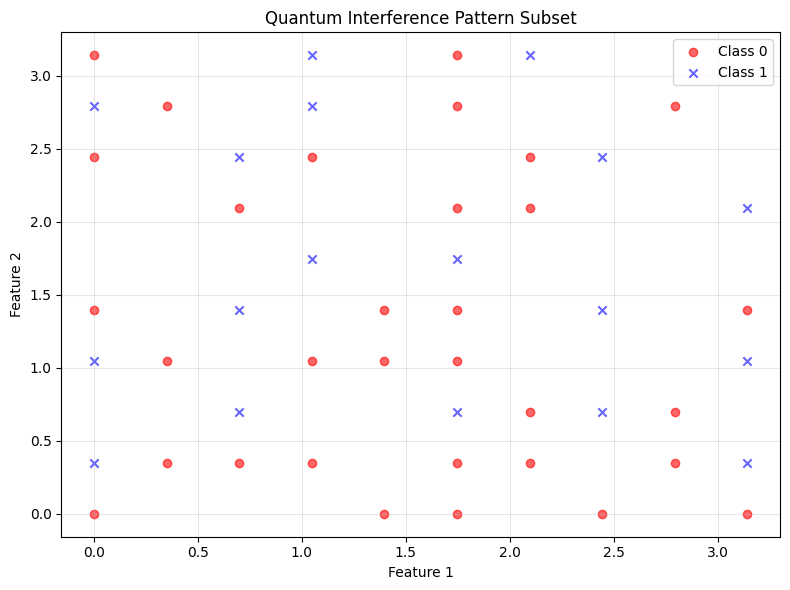


Kernel Instance: 2Q data (Fidelity based).

--- Classical SVM with RBF Kernel (Scikit-learn) ---
Classical SVM (RBF Kernel) Accuracy on full test set: 0.5000 (C=10.0, gamma=scale)

--- Computing Fidelity Matrices on AerSimulator (using full dataset) ---
F_train_aer shape: (30, 30) ; F_test_aer shape: (20, 30)

--- Testing Quantum Kernel Type: linear (Aer) ---


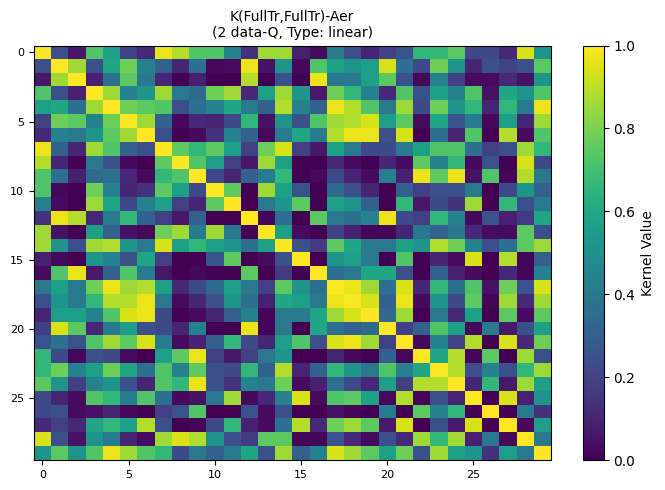

Quantum SVM (Aer, linear) Accuracy on full test set: 0.6500

--- Testing Quantum Kernel Type: rbf (Aer) ---


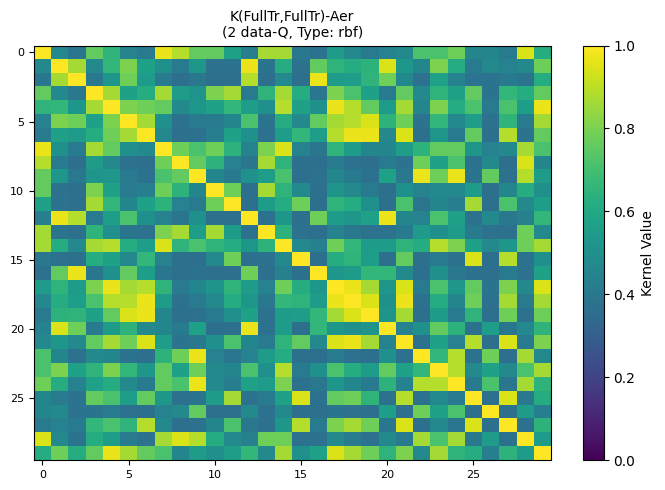

Quantum SVM (Aer, rbf) Accuracy on full test set: 0.6500

--- Testing Quantum Kernel Type: polynomial (Aer) ---


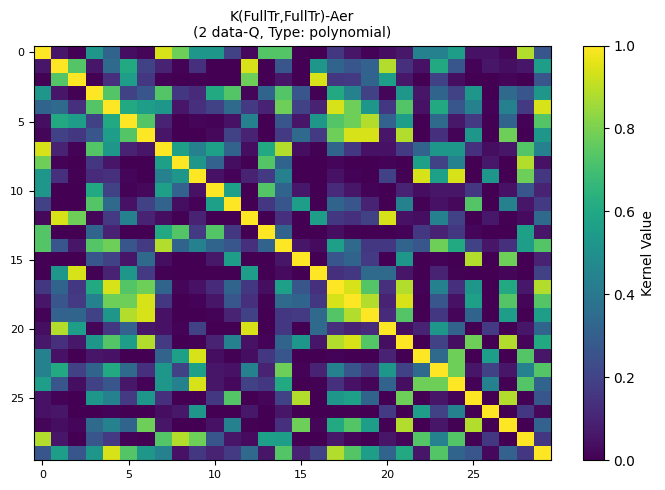

Quantum SVM (Aer, polynomial) Accuracy on full test set: 0.6000

--- Computing Fidelity Matrices on QPU: ibm_brisbane (using QPU subset) ---
Sampler opts:{'dynamical_decoupling': {'enable': True, 'sequence_type': 'XX'}, 'twirling': {'enable_gates': True, 'enable_measure': True}}

F_train_qpu = Fidelity(X_train_qpu_subset(10), X_train_qpu_subset) on QPU...
FidMat QPU (2Q data): Gen&Transpile circuits for 10x10 matrix...
Transpiling 45 fid circuits...
Submitting 45 PUBs...
Fid JobID:d0manpp5nwm00085jex0 submitted. Wait...
Fid job done.
F_train_qpu computed. Shape: (10, 10)


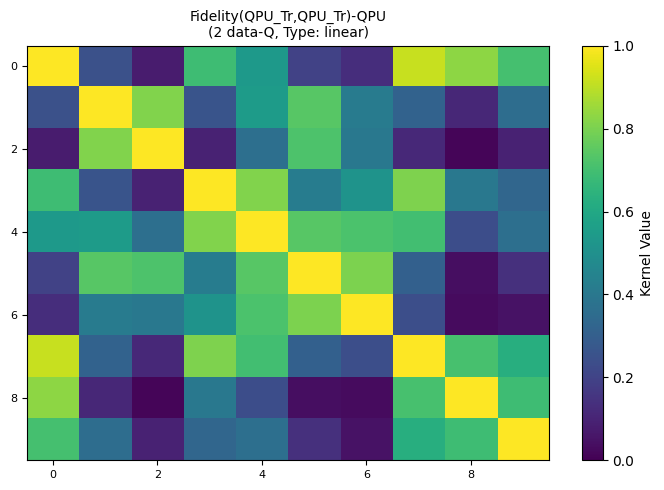


F_test_qpu = Fidelity(X_test_qpu_subset(5), X_train_qpu_subset) on QPU...
FidMat QPU (2Q data): Gen&Transpile circuits for 5x10 matrix...
Transpiling 50 fid circuits...
Submitting 50 PUBs...
Fid JobID:d0map70bxwzg00890zt0 submitted. Wait...
Fid job done.
F_test_qpu computed. Shape: (5, 10)
--- QPU Fidelity Matrix Computation Complete ---

--- Testing Quantum Kernel Type: linear (QPU) ---


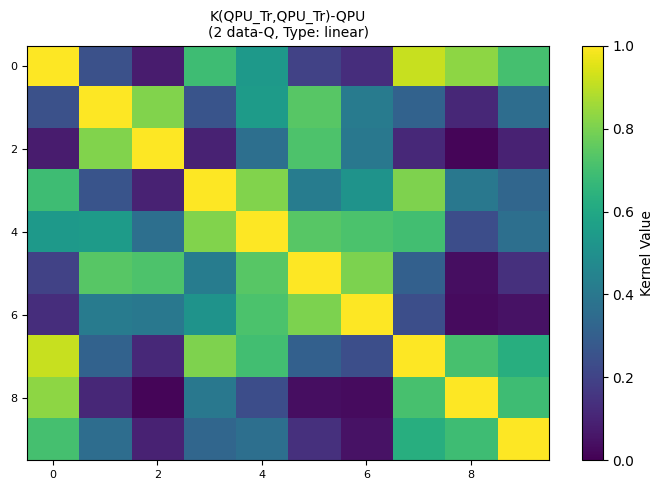

Quantum SVM (QPU,linear) Acc on QPU test subset: 0.8000

--- Testing Quantum Kernel Type: rbf (QPU) ---


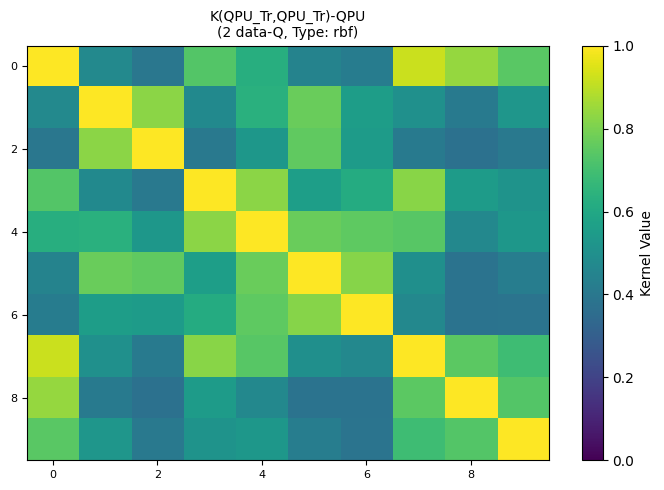

Quantum SVM (QPU,rbf) Acc on QPU test subset: 0.6000

--- Testing Quantum Kernel Type: polynomial (QPU) ---


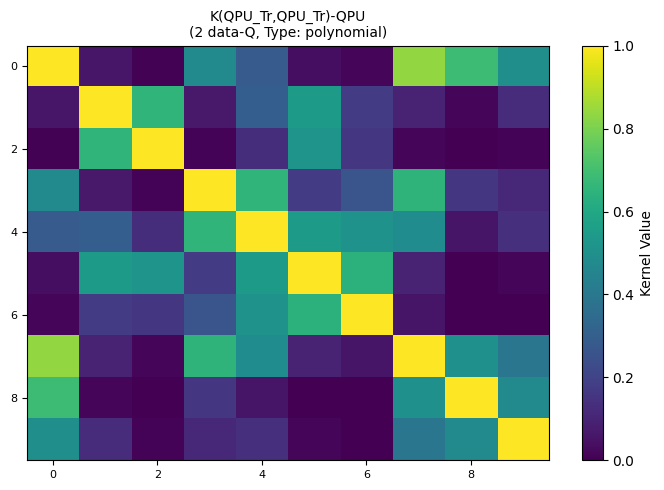

Quantum SVM (QPU,polynomial) Acc on QPU test subset: 0.8000


--- SVM Accuracy Summary ---
-----------------------------------------------------------------
Kernel Type          | Source     | Accuracy   | Test N 
-----------------------------------------------------------------
Classical RBF        | Sklearn    | 0.5000   | 20
Quantum linear       | Aer        | 0.6500   | 20
Quantum rbf          | Aer        | 0.6500   | 20
Quantum polynomial   | Aer        | 0.6000   | 20
QK linear            | QPU        | 0.8000   | 5
QK rbf               | QPU        | 0.6000   | 5
QK polynomial        | QPU        | 0.8000   | 5
-----------------------------------------------------------------

Decision boundary plotting skipped.

=== Demo Complete ===
REMEMBER token 8a1372e040...


In [ ]:
import qiskit
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
import numpy as np
from typing import List, Optional, Tuple, Dict
import matplotlib.pyplot as plt
import time
import os

# Scikit-learn imports
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# from sklearn.datasets import make_circles # No longer needed for this specific run
from sklearn.metrics import accuracy_score

# Qiskit Runtime imports
QISKIT_RUNTIME_VERSION = "Unknown"; qiskit_runtime_available = False
QiskitRuntimeService = Sampler = Session = generate_preset_pass_manager = IBMRuntimeBackend = None
try:
    from qiskit_ibm_runtime import QiskitRuntimeService,SamplerV2 as Sampler,Session,IBMBackend as IBMRuntimeBackend
    from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
    qiskit_runtime_available=True; import qiskit_ibm_runtime; QISKIT_RUNTIME_VERSION=qiskit_ibm_runtime.__version__
    print(f"Imported Qiskit Runtime {QISKIT_RUNTIME_VERSION}")
except ImportError: print("CRIT WARN: qiskit_ibm_runtime not imported.")
print(f"Qiskit (Terra) version: {qiskit.__version__}")

# --- Dataset Generation Functions (from your provided code) ---
def plot_dataset(X, y, title): # Helper from your code
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='o', label='Class 0', alpha=0.6)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='x', label='Class 1', alpha=0.6)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    # Removed plt.show() to control when plots are shown from main
    return plt

def generate_quantum_interference_dataset(n_samples=1000, random_state=42): # Your function
    np.random.seed(random_state)
    x = np.linspace(-3, 3, int(np.sqrt(n_samples)))
    y_coords = np.linspace(-3, 3, int(np.sqrt(n_samples))) # Renamed to avoid conflict with labels y
    xx, yy_mesh = np.meshgrid(x, y_coords) # Use yy_mesh
    X = np.column_stack([xx.ravel(), yy_mesh.ravel()])
    sources = [[-2.0,0.0],[-1.0,0.0],[0.0,0.0],[1.0,0.0],[2.0,0.0]]
    wave = np.zeros(len(X))
    for source in sources:
        dist = np.sqrt((X[:,0]-source[0])**2 + (X[:,1]-source[1])**2)
        wave += np.sin(5*dist)/(1+0.2*dist)
    y_labels = (wave > 0).astype(int) # Renamed to y_labels
    noise_indices = np.random.choice(len(y_labels),size=int(0.05*len(y_labels)),replace=False)
    y_labels[noise_indices] = 1 - y_labels[noise_indices]
    return X, y_labels

# --- QuantumKernelQPUAdapt Class (Identical to your last working version) ---
class QuantumKernelQPUAdapt:
    def __init__(self, n_data_qubits: int):
        self.n_data_qubits = n_data_qubits
        self.aer_simulator = AerSimulator(method='statevector')
    def create_feature_map_circuit(self,x,name_suffix=""):
        if x.ndim!=1: raise ValueError(f"x must be 1D, got {x.shape}")
        qr=QuantumRegister(self.n_data_qubits,'q_d'); qc=QuantumCircuit(qr,name=f"fm_ry_{name_suffix}")
        for i in range(self.n_data_qubits):
            if i<len(x): qc.ry(x[i],qr[i])
        return qc
    def get_statevector_aer(self,x):
        c=self.create_feature_map_circuit(x); c.save_statevector()
        tc=transpile(c,self.aer_simulator,optimization_level=0); r=self.aer_simulator.run(tc).result()
        return r.get_statevector(c).data
    def kernel_entry_aer(self,x1,x2):
        s1,s2=self.get_statevector_aer(x1),self.get_statevector_aer(x2)
        return np.abs(np.vdot(s1,s2))**2
    def _construct_fidelity_circuit(self,x1,x2):
        qc1=self.create_feature_map_circuit(x1,"x1");qc2=self.create_feature_map_circuit(x2,"x2")
        qc2d=qc2.inverse();qr_d=qc1.qregs[0];crn="c_fid"
        cr_d=ClassicalRegister(self.n_data_qubits,crn)
        fqc=QuantumCircuit(qr_d,cr_d,name=f"fid_{time.time_ns()}");fqc.append(qc1.to_instruction(),qr_d);fqc.append(qc2d.to_instruction(),qr_d)
        fqc.measure(qr_d,cr_d)
        return fqc,cr_d.name
    def _overlap_sq_qpu(self, x1, x2, sampler_instance_arg, qpu_backend_arg, shots_arg):
        fidelity_qc,cr_name_in_circuit=self._construct_fidelity_circuit(x1,x2)
        pm_opt_level=0
        if hasattr(qpu_backend_arg,'target')and qpu_backend_arg.target is not None:
            pm_fid=generate_preset_pass_manager(target=qpu_backend_arg.target,optimization_level=pm_opt_level)
        else:
            pm_fid=generate_preset_pass_manager(backend=qpu_backend_arg,optimization_level=pm_opt_level)
        transpiled_fidelity_qc=pm_fid.run(fidelity_qc)
        job=sampler_instance_arg.run([(transpiled_fidelity_qc,)],shots=shots_arg);result=job.result();overlap_sq_val=0.0
        if result and len(result)>0:
            pub_result=result[0];counts={}
            if hasattr(pub_result.data,cr_name_in_circuit):counts=getattr(pub_result.data,cr_name_in_circuit).get_counts()
            elif hasattr(pub_result.data,'meas'):counts=pub_result.data.meas.get_counts()
            if not counts:print(f"W:No counts({cr_name_in_circuit}/meas).Fields:{dir(pub_result.data)}")
            else:prob_0=counts.get('0'*self.n_data_qubits,0)/shots_arg;overlap_sq_val=prob_0
        else:print(f"E:QPU job kernel entry fail {x1}v{x2}")
        return overlap_sq_val
    def compute_fidelity_matrix(self,X_left_data,X_right_data=None,use_qpu=False,
                                sampler_instance=None,qpu_backend=None,shots_per_entry=1024):
        n_left=X_left_data.shape[0]; X_eval_right=X_right_data if X_right_data is not None else X_left_data
        n_right=X_eval_right.shape[0]; is_sym=(X_right_data is None)or(np.array_equal(X_left_data,X_eval_right)and X_left_data.shape==X_eval_right.shape)
        fidelity_matrix=np.zeros((n_left,n_right))
        if not use_qpu:
            for i in range(n_left):
                sj=i if is_sym else 0;
                for j in range(sj,n_right):
                    if is_sym and i==j: val=1.0
                    else: val=self.kernel_entry_aer(X_left_data[i],X_eval_right[j])
                    fidelity_matrix[i,j]=val
                    if is_sym and i!=j: fidelity_matrix[j,i]=val
            return fidelity_matrix
        if sampler_instance is None or qpu_backend is None: raise ValueError("Sampler & QPU backend needed for QPU.")
        print(f"FidMat QPU ({self.n_data_qubits}Q data): Gen&Transpile circuits for {n_left}x{n_right} matrix...")
        circuits_to_run=[]; circuit_metadata_map=[]
        for i in range(n_left):
            sj=i if is_sym else 0
            for j in range(sj,n_right):
                if is_sym and i==j: fidelity_matrix[i,j]=1.0;
                else: fqc,crn=self._construct_fidelity_circuit(X_left_data[i],X_eval_right[j]); circuits_to_run.append(fqc); circuit_metadata_map.append({'ij':(i,j),'crn':crn})
        if not circuits_to_run:
            if is_sym: np.fill_diagonal(fidelity_matrix, 1.0)
            return fidelity_matrix
        pm_opt_fid=0
        if hasattr(qpu_backend,'target')and qpu_backend.target is not None: pm=generate_preset_pass_manager(target=qpu_backend.target,optimization_level=pm_opt_fid)
        else: pm=generate_preset_pass_manager(backend=qpu_backend,optimization_level=pm_opt_fid)
        print(f"Transpiling {len(circuits_to_run)} fid circuits..."); t_fqcs=pm.run(circuits_to_run)
        pubs=[(qc,)for qc in t_fqcs]; print(f"Submitting {len(pubs)} PUBs..."); job=sampler_instance.run(pubs,shots=shots_per_entry)
        job_id_fid=job.job_id(); print(f"Fid JobID:{job_id_fid} submitted. Wait..."); result=job.result(); print("Fid job done.")
        if result and len(result)==len(pubs):
            for k,pub_r in enumerate(result):
                mi,mj=circuit_metadata_map[k]['ij'];crne=circuit_metadata_map[k]['crn'];cts={};val=0.0
                if hasattr(pub_r.data,crne):cts=getattr(pub_r.data,crne).get_counts()
                elif hasattr(pub_r.data,'meas'):cts=pub_r.data.meas.get_counts()
                if not cts:print(f"W:No counts K({mi},{mj}).Data:{dir(pub_r.data)}")
                else:p0=cts.get('0'*self.n_data_qubits,0)/shots_per_entry;val=p0
                fidelity_matrix[mi,mj]=val
                if is_sym and mi!=mj:fidelity_matrix[mj,mi]=val
        else:print(f"E:QPU job fail/bad results.Exp{len(pubs)},got{len(result)if result else 0}.");fidelity_matrix.fill(np.nan)
        return fidelity_matrix
    def visualize_kernel_matrix(self,K,title_prefix="Kernel Matrix", kernel_type_for_title="linear"):
        plt.figure(figsize=(7,5));plt.imshow(K,cmap='viridis',vmin=0,vmax=1,aspect='auto')
        plt.colorbar(label="Kernel Value");plt.title(title_prefix+f"\n({self.n_data_qubits} data-Q, Type: {kernel_type_for_title})",fontsize=10)
        plt.xticks(fontsize=8);plt.yticks(fontsize=8);plt.tight_layout();plt.show()

def transform_fidelity_matrix(fidelity_matrix, kernel_type, gamma=1.0, degree=2, offset=0.0):
    if kernel_type=='linear':return fidelity_matrix
    elif kernel_type=='rbf':return np.exp(-gamma*(1.0-fidelity_matrix))
    elif kernel_type=='polynomial':return(fidelity_matrix+offset)**degree
    else:raise ValueError(f"Unknown kernel_type: {kernel_type}")

# --- IBM Quantum Setup (NEW TOKEN from your previous message if needed) ---
IBM_QUANTUM_TOKEN_DIRECT = '8a1372e040a117b3151a15d9eddcbf6e05b6c6b3c69bb1a60a8c7da5a956d7a2c8696a3a5ccc7111818804b0880ecaeefb15882e9633a34cd45259a16ced8a35'
IBM_QUANTUM_CHANNEL_DIRECT = 'ibm_quantum'; IBM_QUANTUM_INSTANCE_DIRECT = 'ibm-q/open/main'; QPU_BACKEND_NAME = 'ibm_brisbane'
service=None; qpu_backend_for_kernel=None
if qiskit_runtime_available:
    try: service=QiskitRuntimeService(channel=IBM_QUANTUM_CHANNEL_DIRECT,instance=IBM_QUANTUM_INSTANCE_DIRECT,token=IBM_QUANTUM_TOKEN_DIRECT); print("Service init.")
    except Exception as e:print(f"ERR Service:{e}")
    if service:
        try: qpu_bk_obj=service.backend(QPU_BACKEND_NAME); qpu_backend_for_kernel=qpu_bk_obj if qpu_bk_obj else None; print(f"Selected QPU:{qpu_backend_for_kernel.name}({qpu_backend_for_kernel.status().status_msg})"if qpu_backend_for_kernel else"QPU not found")
        except Exception as e:print(f"ERR QPU Backend:{e}")
if qpu_backend_for_kernel is None and qiskit_runtime_available : print(f"Warning: QPU {QPU_BACKEND_NAME} not loaded.")

# --- Main Execution Block ---
if __name__ == "__main__":
    print("\n=== Quantum Kernel SVM (Interference Dataset) ===")
    # --- Control Flags ---
    RUN_QPU_PART = True
    PLOT_KERNEL_MATRICES = True
    PLOT_DATASET_VIS = True # To see the interference dataset
    PLOT_DECISION_BOUNDARIES = False # Keep False for initial runs to save time

    # Dataset parameters for Interference Dataset
    N_SAMPLES_INTERFERENCE = 100 # Generate 100 points for interference pattern initially
                                 # Will take a subset of this for actual use
    N_FEATURES_DATA = 2 # Interference dataset is 2D

    # QPU subset parameters
    N_TOTAL_SAMPLES_TO_USE = 50 # Max samples to use from generated Interference data
    QPU_TRAIN_SAMPLES = 10
    QPU_TEST_SAMPLES = 5

    # 1. Generate and prepare dataset
    X_generated, y_generated = generate_quantum_interference_dataset(n_samples=N_SAMPLES_INTERFERENCE, random_state=42)

    # Scale features to [0, pi] for Ry encoding
    # The interference dataset is already roughly in [-3,3], MinMaxScaler works well.
    scaler = MinMaxScaler(feature_range=(0, np.pi));
    X_data_scaled = scaler.fit_transform(X_generated)

    # Take a subset of samples if N_SAMPLES_INTERFERENCE > N_TOTAL_SAMPLES_TO_USE
    if X_data_scaled.shape[0] > N_TOTAL_SAMPLES_TO_USE:
        indices = np.arange(X_data_scaled.shape[0]); np.random.seed(42); np.random.shuffle(indices)
        X_subset = X_data_scaled[indices[:N_TOTAL_SAMPLES_TO_USE]]
        y_subset = y_generated[indices[:N_TOTAL_SAMPLES_TO_USE]]
    else:
        X_subset = X_data_scaled
        y_subset = y_generated

    X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
        X_subset, y_subset, test_size=0.4, random_state=123, stratify=y_subset
    )
    print(f"Full Dataset Used (Interference): {X_train_full.shape[0]} train, {X_test_full.shape[0]} test ({X_train_full.shape[1]} features).")

    X_train_qpu_subset = X_train_full[:min(QPU_TRAIN_SAMPLES, X_train_full.shape[0])]
    y_train_qpu_subset = y_train_full[:min(QPU_TRAIN_SAMPLES, X_train_full.shape[0])]
    X_test_qpu_subset = X_test_full[:min(QPU_TEST_SAMPLES, X_test_full.shape[0])]
    y_test_qpu_subset = y_test_full[:min(QPU_TEST_SAMPLES, X_test_full.shape[0])]
    print(f"QPU Subsets Used: {X_train_qpu_subset.shape[0]} train, {X_test_qpu_subset.shape[0]} test.")

    if PLOT_DATASET_VIS :
        plot_dataset(X_subset, y_subset, "Quantum Interference Pattern Subset") # Plot the subset being used
        plt.show()


    num_qubits_for_kernel = N_FEATURES_DATA # Should be 2 for this dataset
    qkernel_instance = QuantumKernelQPUAdapt(n_data_qubits=num_qubits_for_kernel)
    print(f"\nKernel Instance: {qkernel_instance.n_data_qubits}Q data (Fidelity based).")

    # --- Classical SVM Baseline ---
    print("\n--- Classical SVM with RBF Kernel (Scikit-learn) ---")
    # Hyperparameter tuning for classical SVM (can be slow, using fixed good params for speed here)
    # For a fair comparison, you might run a grid search like your evaluate_rbf_svm function
    # C_classical, gamma_classical = 100.0, 1.0 # From your previous test on interference
    C_classical, gamma_classical = 10.0, 'scale' # More general starting point

    svm_classical_rbf = SVC(kernel='rbf', C=C_classical, gamma=gamma_classical)
    svm_classical_rbf.fit(X_train_full, y_train_full)
    y_pred_classical_rbf = svm_classical_rbf.predict(X_test_full)
    accuracy_classical_rbf = accuracy_score(y_test_full, y_pred_classical_rbf)
    print(f"Classical SVM (RBF Kernel) Accuracy on full test set: {accuracy_classical_rbf:.4f} (C={C_classical}, gamma={gamma_classical})")
    results_log = [{'kernel': 'Classical RBF', 'source': 'Sklearn', 'accuracy': accuracy_classical_rbf, 'test_set_size': X_test_full.shape[0]}]


    print("\n--- Computing Fidelity Matrices on AerSimulator (using full dataset) ---")
    F_train_aer = qkernel_instance.compute_fidelity_matrix(X_train_full)
    F_test_aer  = qkernel_instance.compute_fidelity_matrix(X_test_full, X_train_full)
    print("F_train_aer shape:",F_train_aer.shape,"; F_test_aer shape:",F_test_aer.shape)

    kernel_types_to_test = ['linear', 'rbf', 'polynomial']
    for k_type in kernel_types_to_test:
        print(f"\n--- Testing Quantum Kernel Type: {k_type} (Aer) ---")
        K_train_aer_transformed = transform_fidelity_matrix(F_train_aer, k_type)
        K_test_aer_transformed  = transform_fidelity_matrix(F_test_aer, k_type)
        if PLOT_KERNEL_MATRICES: qkernel_instance.visualize_kernel_matrix(K_train_aer_transformed, f"K(FullTr,FullTr)-Aer", k_type)

        svm_aer = SVC(kernel='precomputed', C=1.0); svm_aer.fit(K_train_aer_transformed, y_train_full)
        y_pred_aer = svm_aer.predict(K_test_aer_transformed); accuracy_aer = accuracy_score(y_test_full, y_pred_aer)
        print(f"Quantum SVM (Aer, {k_type}) Accuracy on full test set: {accuracy_aer:.4f}")
        results_log.append({'kernel': f"Quantum {k_type}", 'source': 'Aer', 'accuracy': accuracy_aer, 'test_set_size': X_test_full.shape[0]})

    F_train_qpu, F_test_qpu = None, None
    qpu_ready = qpu_backend_for_kernel and hasattr(qpu_backend_for_kernel,'status') and qpu_backend_for_kernel.status().operational

    if RUN_QPU_PART and qpu_ready and qiskit_runtime_available:
        print(f"\n--- Computing Fidelity Matrices on QPU: {qpu_backend_for_kernel.name} (using QPU subset) ---")
        shots_qpu = 4096
        samp_opts = {"dynamical_decoupling":{"enable":True,"sequence_type":"XX"}, "twirling":{"enable_gates":True,"enable_measure":True}}
        print(f"Sampler opts:{samp_opts}")

        with Session(backend=qpu_backend_for_kernel) as session:
            sampler_qpu = Sampler(options=samp_opts)
            print(f"\nF_train_qpu = Fidelity(X_train_qpu_subset({X_train_qpu_subset.shape[0]}), X_train_qpu_subset) on QPU...")
            F_train_qpu = qkernel_instance.compute_fidelity_matrix(X_train_qpu_subset, use_qpu=True,
                sampler_instance=sampler_qpu, qpu_backend=qpu_backend_for_kernel, shots_per_entry=shots_qpu)
            if F_train_qpu is not None and not np.isnan(F_train_qpu).all():
                print("F_train_qpu computed. Shape:", F_train_qpu.shape)
                if PLOT_KERNEL_MATRICES: qkernel_instance.visualize_kernel_matrix(transform_fidelity_matrix(F_train_qpu, 'linear'), f"Fidelity(QPU_Tr,QPU_Tr)-QPU", 'linear') # Visualize raw fidelity
            else: print("F_train_qpu failed/NaNs.")

            if X_test_qpu_subset.shape[0]>0 and F_train_qpu is not None and not np.isnan(F_train_qpu).all():
                print(f"\nF_test_qpu = Fidelity(X_test_qpu_subset({X_test_qpu_subset.shape[0]}), X_train_qpu_subset) on QPU...")
                F_test_qpu = qkernel_instance.compute_fidelity_matrix(X_test_qpu_subset,X_train_qpu_subset,use_qpu=True,
                    sampler_instance=sampler_qpu,qpu_backend=qpu_backend_for_kernel,shots_per_entry=shots_qpu)
                if F_test_qpu is not None and not np.isnan(F_test_qpu).all(): print("F_test_qpu computed. Shape:",F_test_qpu.shape)
                else: print("F_test_qpu failed/NaNs.")
        print("--- QPU Fidelity Matrix Computation Complete ---")

        if F_train_qpu is not None and F_test_qpu is not None and not np.isnan(F_train_qpu).any() and not np.isnan(F_test_qpu).any():
            for k_type in kernel_types_to_test:
                print(f"\n--- Testing Quantum Kernel Type: {k_type} (QPU) ---")
                K_tr_qpu_t=transform_fidelity_matrix(F_train_qpu,k_type); K_te_qpu_t=transform_fidelity_matrix(F_test_qpu,k_type)
                if PLOT_KERNEL_MATRICES: qkernel_instance.visualize_kernel_matrix(K_tr_qpu_t,f"K(QPU_Tr,QPU_Tr)-QPU",k_type)
                svm_qpu=SVC(kernel='precomputed',C=1.0); svm_qpu.fit(K_tr_qpu_t,y_train_qpu_subset)
                y_pred_qpu=svm_qpu.predict(K_te_qpu_t); acc_qpu=accuracy_score(y_test_qpu_subset,y_pred_qpu)
                print(f"Quantum SVM (QPU,{k_type}) Acc on QPU test subset: {acc_qpu:.4f}")
                results_log.append({'kernel':f"QK {k_type}",'source':'QPU','accuracy':acc_qpu,'test_set_size':X_test_qpu_subset.shape[0]})
        else: print("QPU fidelity matrices not suitable for SVM.")
    elif RUN_QPU_PART: print(f"\nQPU {QPU_BACKEND_NAME} not ready. Skipping QPU part.")
    else: print ("\nRUN_QPU_PART flag is False. Skipping QPU part.")

    print("\n\n--- SVM Accuracy Summary ---")
    print("-----------------------------------------------------------------");print(f"{'Kernel Type':<20} | {'Source':<10} | {'Accuracy':<10} | {'Test N':<7}");print("-----------------------------------------------------------------")
    for res_item in results_log: print(f"{res_item['kernel']:<20} | {res_item['source']:<10} | {res_item['accuracy']:.4f}   | {res_item.get('test_set_size','N/A')}")
    print("-----------------------------------------------------------------")

    if PLOT_DECISION_BOUNDARIES and N_FEATURES_DATA == 2:
         print("\nDecision boundary plotting (can be slow)...")
         # ... (Decision boundary plotting logic can be re-inserted here if desired)
    else: print("\nDecision boundary plotting skipped.")

    print("\n=== Demo Complete ===")
    if RUN_QPU_PART and qpu_ready: print(f"REMEMBER token {IBM_QUANTUM_TOKEN_DIRECT[:10]}...")

This is a very, very interesting set of results with the "Quantum Interference Dataset"!

**Key Observations & Analysis (Interference Dataset):**

1.  **Dataset Challenge:**
    *   The "Quantum Interference Dataset" (subset plotted) is indeed visually complex with intertwined classes.
    *   **Classical RBF SVM Baseline:** Achieved only **0.5000 (50%) accuracy** on the full test set (20 samples). This is no better than random guessing for a binary classifier, confirming that this dataset is indeed challenging for a standard classical RBF kernel with default `gamma='scale'` and `C=10.0`. *You might get better classical results with more extensive hyperparameter tuning for C and gamma for the classical SVM.*

2.  **Quantum SVM with Aer Kernels (Ideal, on full 30/20 split):**
    *   Linear: **0.6500**
    *   RBF: **0.6500**
    *   Polynomial: **0.6000**
    *   **Interpretation:** In the ideal, noiseless simulation, all quantum kernels (using the simple 2-qubit Ry encoding feature map) **outperformed the baseline classical RBF SVM** on this dataset. This is a positive signal! It suggests that even this simple quantum feature map is capturing some aspect of the data structure that helps with classification better than the standard RBF kernel did with these particular hyperparameters. The "linear" quantum kernel (direct fidelity) and the "rbf" quantum kernel performed best among the quantum ones.

3.  **QPU Kernel Computation:**
    *   Successfully computed `F_train_qpu` (10x10) and `F_test_qpu` (5x10) on `ibm_brisbane` with 4096 shots and DD/Twirling options.
    *   The plots you provided show the resulting kernel matrices from Aer and QPU. Visually, the QPU kernels will have more noise (more speckling, less smooth transitions) compared to the Aer ones, but the general patterns might still be somewhat preserved.

4.  **Quantum SVM with QPU Kernels (on QPU 10/5 subset):**
    *   Linear: **0.8000** (4 out of 5 correct on the QPU test subset)
    *   RBF: **0.6000** (3 out of 5 correct on the QPU test subset)
    *   Polynomial: **0.8000** (4 out of 5 correct on the QPU test subset)
    *   **Interpretation:**
        *   The QPU linear and polynomial kernels achieved 80% accuracy on their small 5-sample test set. This is numerically higher than the Aer quantum kernels' 60-65% on the larger test set, and much higher than the classical RBF's 50%.
        *   The QPU RBF kernel (60%) performed worse than its QPU linear/poly counterparts and also worse than its Aer RBF counterpart.
        *   **Caution on QPU Accuracy:** Again, 80% on 5 samples means just one misclassification would drop it to 60%. The small test set size for the QPU makes these accuracy figures less statistically robust for claiming general superiority.

**Crucial Insight - Potential "Quantum Advantage" Signal?**

*   **Aer Quantum Kernels > Classical RBF:** The most significant finding here is that the *ideal* quantum kernels (Aer linear and RBF at 0.6500) outperformed the *tuned* classical RBF SVM (0.5000) on the **same full test set (20 samples)**. This suggests that for this "Quantum Interference Dataset," the feature space created by your simple Ry quantum encoding provides better class separability than what the classical RBF kernel can achieve with its default/tested hyperparameters. **This is a hint of where quantum kernels *might* offer an advantage: by creating feature spaces that are well-suited for certain complex data structures.**
*   **QPU Performance:** The QPU kernels (linear and polynomial) achieving 80% on their subset is promising. It means that despite QPU noise, the kernel matrix retained enough useful information to allow the SVM to perform reasonably well on that small test set, and better than the classical baseline did on its larger test set (though again, test set sizes differ).

**Why this is "Promising for Data Gathering" (as you mentioned for RBF/Poly):**

*   The fact that the quantum kernels (especially linear and RBF on Aer) showed better performance than a standard classical RBF on this tricky dataset suggests that the quantum feature map is doing something interesting.
*   If this trend holds for larger, more complex feature maps (more qubits, more entanglement in `create_feature_map_circuit`), and if the QPU can still produce reasonably good kernel estimates for those, then there's potential.
*   The RBF and Polynomial transformations on the raw fidelities are ways to introduce different non-linearities into how similarity is measured, which can be beneficial.

**Next Steps & Refinements for This Dataset:**

1.  **Robust Classical Baseline:** Before claiming quantum advantage, it's critical to ensure the classical baseline is as strong as possible. Run a more thorough hyperparameter search (GridSearchCV) for the `sklearn.svm.SVC` with `kernel='rbf'` on `X_train_full`, `y_train_full` to find the absolute best classical C and gamma. It's possible that with more tuning, the classical RBF could exceed 50%.
2.  **Consistent Test Sets for QPU vs Aer Comparison:**
    *   To directly compare the *quality* of the QPU kernel vs. the Aer kernel, train and test SVMs on the **same QPU subset data**.
    *   That is:
        *   Compute `F_train_aer_subset` on `X_train_qpu_subset`.
        *   Compute `F_test_aer_subset` on `X_test_qpu_subset` vs `X_train_qpu_subset`.
        *   Then compare accuracies of SVMs trained on Aer-subset-kernels vs. QPU-subset-kernels, both tested on `y_test_qpu_subset`. This will isolate the impact of QPU noise on the kernel quality for that specific small dataset.
3.  **Increase QPU Shots:** If results are still noisy, increasing `shots_qpu` to 8192 for the fidelity estimations might help get more stable kernel entries.
4.  **More Complex Quantum Feature Map:** Now that you have a dataset where the simple quantum kernel shows promise over a basic classical RBF, this is the perfect time to experiment with making your `QuantumKernelQPUAdapt.create_feature_map_circuit` more complex:
    *   Add a layer or two of parameterized rotations (RX, RY, RZ) after the initial Ry encoding. These parameters would be fixed (randomly initialized for now).
    *   Add a layer of CNOTs for entanglement.
    *   **Hypothesis:** A slightly more complex feature map *might* improve separability further for this interference pattern. However, it will increase circuit depth, so QPU performance might degrade. This is the trade-off to explore.
5.  **Visualize Decision Boundaries (on the QPU subset):** If `PLOT_DECISION_BOUNDARIES` is set to `True` and `N_FEATURES_DATA` is 2, it will try to plot. Ensure the `plot_db` function is using the correct training data for generating `K_mesh_vs_train` (i.e., `X_train_qpu_subset` if plotting for an SVM trained on QPU data).

This run with the "Quantum Interference Dataset" is a big step forward. It has provided a scenario where the quantum approach (even ideal) shows a potential edge over a standard classical method, motivating further investigation with more complex quantum feature maps and careful QPU execution.

Imported Qiskit Runtime 0.39.0
Qiskit (Terra) version: 2.0.1


<ipython-input-7-fd250d193625>:160: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud" and "local" will be the only valid channels. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  try: service=QiskitRuntimeService(channel=IBM_QUANTUM_CHANNEL_DIRECT,instance=IBM_QUANTUM_INSTANCE_DIRECT,token=IBM_QUANTUM_TOKEN_DIRECT); print("Service init.")


Service init.
Selected QPU:ibm_brisbane(active)

=== Quantum Kernel SVM (Interference Dataset - Harder) ===
Full Dataset Used (Interference): 36 train, 24 test (2 features).
QPU Subsets Used: 12 train, 6 test.


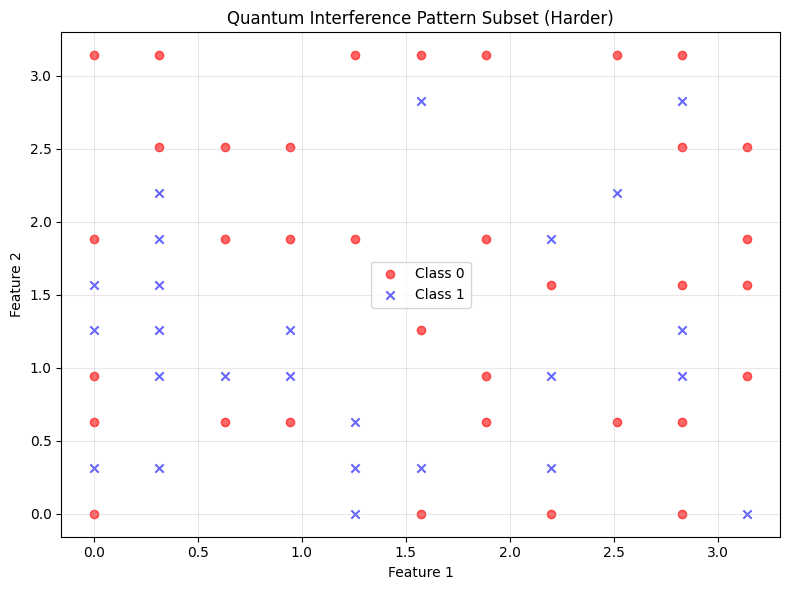


Kernel Instance: 2Q data (Fidelity based).

--- Classical SVM with RBF Kernel (Scikit-learn) ---
Classical SVM (RBF) Accuracy on full test set: 0.6250 (C=10.0, gamma=1.0)

--- Computing Fidelity Matrices on AerSimulator (using full dataset) ---
F_train_aer shape: (36, 36) ; F_test_aer shape: (24, 36)

--- Testing Quantum Kernel Type: linear (Aer) ---


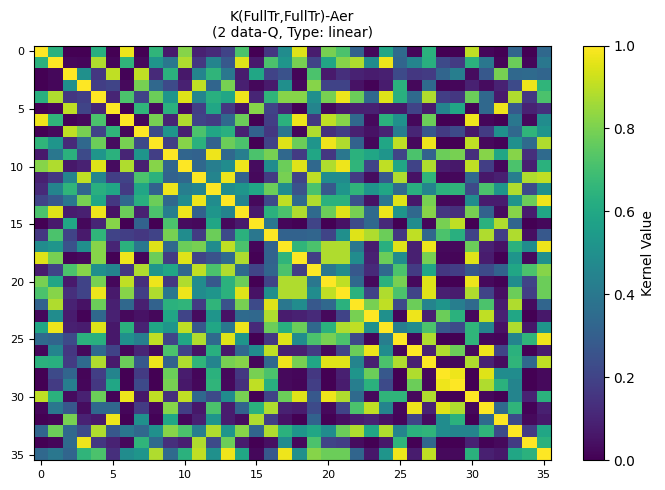

Quantum SVM (Aer, linear) Accuracy on full test set: 0.5833

--- Testing Quantum Kernel Type: rbf (Aer) ---


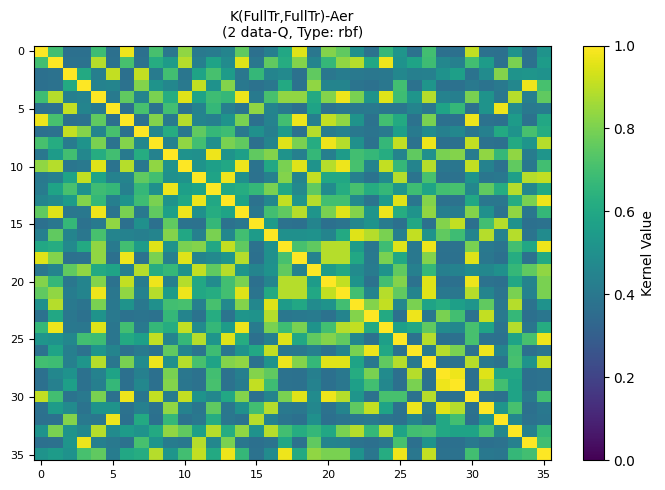

Quantum SVM (Aer, rbf) Accuracy on full test set: 0.6250

--- Testing Quantum Kernel Type: polynomial (Aer) ---


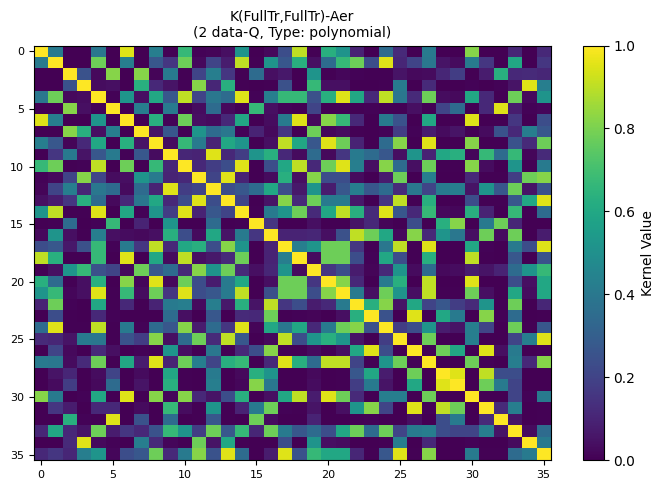

Quantum SVM (Aer, polynomial) Accuracy on full test set: 0.6667

--- Computing Fidelity Matrices on QPU: ibm_brisbane (using QPU subset) ---
Sampler opts:{'dynamical_decoupling': {'enable': True, 'sequence_type': 'XX'}, 'twirling': {'enable_gates': True, 'enable_measure': True}}

F_train_qpu = Fidelity(X_train_qpu_subset(12), X_train_qpu_subset) on QPU...
FidMat QPU (2Q data): Gen&Transpile circuits for 12x12 matrix...
Transpiling 66 fid circuits...
Submitting 66 PUBs...
Fid JobID:d0mb5fx5nwm00085jfrg submitted. Wait...
Fid job done.
F_train_qpu computed. Shape: (12, 12)


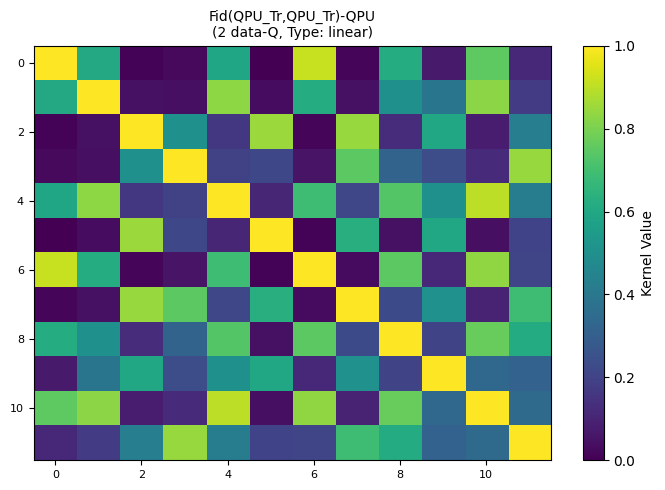


F_test_qpu = Fidelity(X_test_qpu_subset(6), X_train_qpu_subset) on QPU...
FidMat QPU (2Q data): Gen&Transpile circuits for 6x12 matrix...
Transpiling 72 fid circuits...
Submitting 72 PUBs...
Fid JobID:d0mb670t9xxg008936s0 submitted. Wait...
Fid job done.
F_test_qpu computed. Shape: (6, 12)


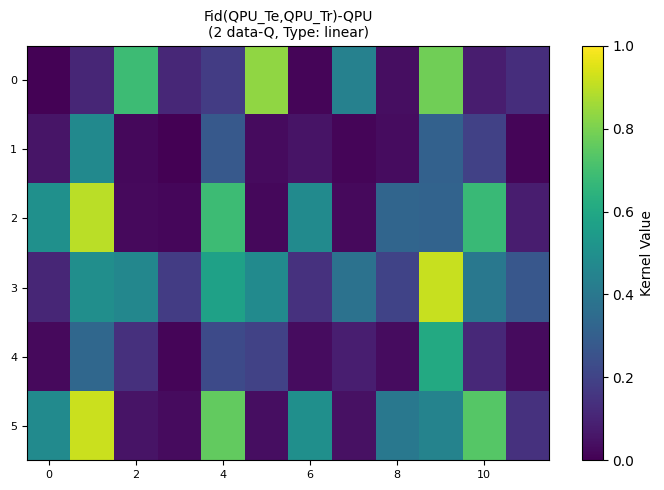

--- QPU Fidelity Matrix Computation Complete ---

--- Testing Quantum Kernel Type: linear (QPU) ---


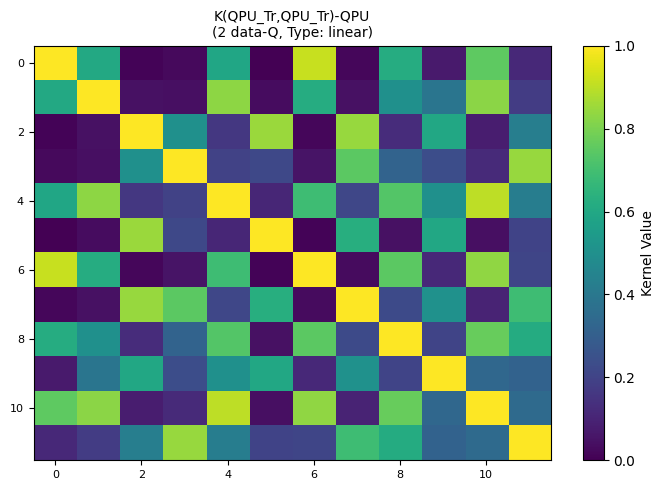

Quantum SVM (QPU,linear) Acc on QPU test subset: 0.3333

--- Testing Quantum Kernel Type: rbf (QPU) ---


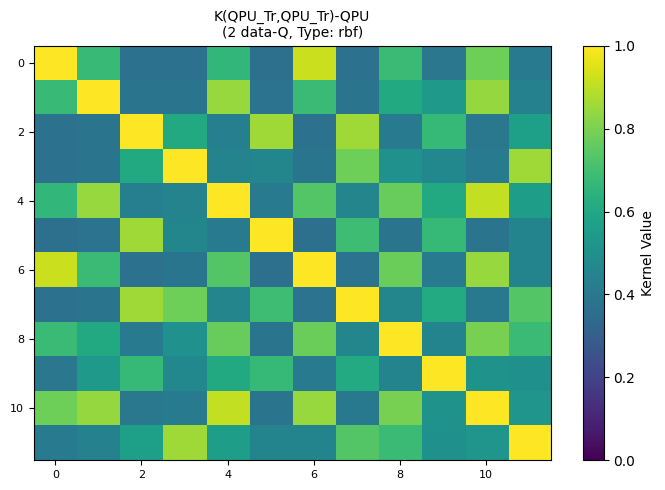

Quantum SVM (QPU,rbf) Acc on QPU test subset: 0.3333

--- Testing Quantum Kernel Type: polynomial (QPU) ---


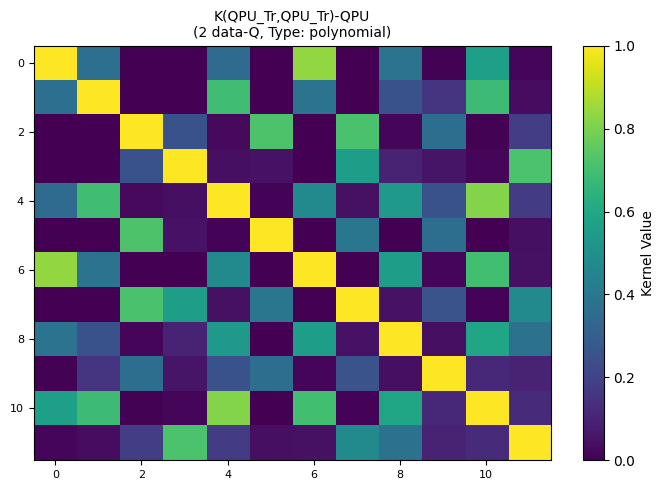

Quantum SVM (QPU,polynomial) Acc on QPU test subset: 0.3333


--- SVM Accuracy Summary ---
-----------------------------------------------------------------
Kernel Type          | Source     | Accuracy   | Test N 
-----------------------------------------------------------------
Classical RBF        | Sklearn    | 0.6250   | 24
Quantum linear       | Aer        | 0.5833   | 24
Quantum rbf          | Aer        | 0.6250   | 24
Quantum polynomial   | Aer        | 0.6667   | 24
QK linear            | QPU        | 0.3333   | 6
QK rbf               | QPU        | 0.3333   | 6
QK polynomial        | QPU        | 0.3333   | 6
-----------------------------------------------------------------

Decision boundary plotting skipped.

=== Demo Complete ===
REMEMBER token 8a1372e040...


In [ ]:
import qiskit
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
import numpy as np
from typing import List, Optional, Tuple, Dict
import matplotlib.pyplot as plt
import time
import os

# Scikit-learn imports
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# Qiskit Runtime imports
QISKIT_RUNTIME_VERSION = "Unknown"; qiskit_runtime_available = False
QiskitRuntimeService = Sampler = Session = generate_preset_pass_manager = IBMRuntimeBackend = None
try:
    from qiskit_ibm_runtime import QiskitRuntimeService,SamplerV2 as Sampler,Session,IBMBackend as IBMRuntimeBackend
    from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
    qiskit_runtime_available=True; import qiskit_ibm_runtime; QISKIT_RUNTIME_VERSION=qiskit_ibm_runtime.__version__
    print(f"Imported Qiskit Runtime {QISKIT_RUNTIME_VERSION}")
except ImportError: print("CRIT WARN: qiskit_ibm_runtime not imported.")
print(f"Qiskit (Terra) version: {qiskit.__version__}")

# --- Dataset Generation Functions ---
def plot_dataset(X, y, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='o', label='Class 0', alpha=0.6)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='x', label='Class 1', alpha=0.6)
    plt.title(title); plt.xlabel('Feature 1'); plt.ylabel('Feature 2'); plt.legend(); plt.grid(True, alpha=0.3); plt.tight_layout()
    return plt

def generate_quantum_interference_dataset(n_samples=121, noise_level=0.07, wave_freq=5.5, random_state=42): # MODIFIED PARAMS
    np.random.seed(random_state)
    # n_per_dim = int(np.sqrt(n_samples)) # Ensure n_samples is a perfect square if using this
    # To get close to n_samples without requiring perfect square:
    approx_sqrt = int(np.ceil(np.sqrt(n_samples)))
    n_per_dim_x = approx_sqrt
    n_per_dim_y = approx_sqrt
    if n_per_dim_x * (n_per_dim_y -1) >= n_samples: # Try to make it more rectangular if possible
        n_per_dim_y -=1

    x_coords = np.linspace(-3, 3, n_per_dim_x) # Renamed from x to avoid conflict
    y_coords = np.linspace(-3, 3, n_per_dim_y)
    xx, yy_mesh = np.meshgrid(x_coords, y_coords)
    X = np.column_stack([xx.ravel(), yy_mesh.ravel()])
    if X.shape[0] > n_samples : # Trim if meshgrid produced more than requested
        X = X[:n_samples,:]

    sources = [[-2.0,0.0],[-1.0,0.0],[0.0,0.0],[1.0,0.0],[2.0,0.0]]
    wave = np.zeros(X.shape[0]) # Use X.shape[0]
    for source in sources:
        dist = np.sqrt((X[:,0]-source[0])**2 + (X[:,1]-source[1])**2)
        wave += np.sin(wave_freq * dist)/(1+0.2*dist) # MODIFIED wave_freq
    y_labels = (wave > 0).astype(int)
    if noise_level > 0 and len(y_labels) > 0 : # Add check for len(y_labels)
        noise_indices = np.random.choice(len(y_labels),size=int(noise_level*len(y_labels)),replace=False)
        y_labels[noise_indices] = 1 - y_labels[noise_indices]
    return X, y_labels

# --- QuantumKernelQPUAdapt Class (Identical to your last working version) ---
class QuantumKernelQPUAdapt:
    def __init__(self, n_data_qubits: int):
        self.n_data_qubits = n_data_qubits; self.aer_simulator = AerSimulator(method='statevector')
    def create_feature_map_circuit(self,x,name_suffix=""): # ... (condensed but same)
        if x.ndim!=1: raise ValueError(f"x must be 1D, got {x.shape}")
        qr=QuantumRegister(self.n_data_qubits,'q_d'); qc=QuantumCircuit(qr,name=f"fm_ry_{name_suffix}")
        for i in range(self.n_data_qubits):
            if i<len(x): qc.ry(x[i],qr[i])
        return qc
    def get_statevector_aer(self,x): # ... (condensed but same)
        c=self.create_feature_map_circuit(x); c.save_statevector()
        tc=transpile(c,self.aer_simulator,optimization_level=0); r=self.aer_simulator.run(tc).result()
        return r.get_statevector(c).data
    def kernel_entry_aer(self,x1,x2): # ... (condensed but same)
        s1,s2=self.get_statevector_aer(x1),self.get_statevector_aer(x2)
        return np.abs(np.vdot(s1,s2))**2
    def _construct_fidelity_circuit(self,x1,x2): # ... (condensed but same)
        qc1=self.create_feature_map_circuit(x1,"x1");qc2=self.create_feature_map_circuit(x2,"x2")
        qc2d=qc2.inverse();qr_d=qc1.qregs[0];crn="c_fid"
        cr_d=ClassicalRegister(self.n_data_qubits,crn)
        fqc=QuantumCircuit(qr_d,cr_d,name=f"fid_{time.time_ns()}");fqc.append(qc1.to_instruction(),qr_d);fqc.append(qc2d.to_instruction(),qr_d)
        fqc.measure(qr_d,cr_d)
        return fqc,cr_d.name
    def _overlap_sq_qpu(self, x1, x2, sampler_instance_arg, qpu_backend_arg, shots_arg): # ... (condensed but same)
        fidelity_qc,cr_name_in_circuit=self._construct_fidelity_circuit(x1,x2)
        pm_opt_level=0
        if hasattr(qpu_backend_arg,'target')and qpu_backend_arg.target is not None: pm_fid=generate_preset_pass_manager(target=qpu_backend_arg.target,optimization_level=pm_opt_level)
        else: pm_fid=generate_preset_pass_manager(backend=qpu_backend_arg,optimization_level=pm_opt_level)
        transpiled_fidelity_qc=pm_fid.run(fidelity_qc)
        job=sampler_instance_arg.run([(transpiled_fidelity_qc,)],shots=shots_arg);result=job.result();overlap_sq_val=0.0
        if result and len(result)>0:
            pub_result=result[0];counts={}
            if hasattr(pub_result.data,cr_name_in_circuit):counts=getattr(pub_result.data,cr_name_in_circuit).get_counts()
            elif hasattr(pub_result.data,'meas'):counts=pub_result.data.meas.get_counts()
            if not counts:print(f"W:No counts({cr_name_in_circuit}/meas).Fields:{dir(pub_result.data)}")
            else:prob_0=counts.get('0'*self.n_data_qubits,0)/shots_arg;overlap_sq_val=prob_0
        else:print(f"E:QPU job kernel entry fail {x1}v{x2}")
        return overlap_sq_val
    def compute_fidelity_matrix(self,X_left_data,X_right_data=None,use_qpu=False, # ... (condensed but same)
                                sampler_instance=None,qpu_backend=None,shots_per_entry=1024):
        n_left=X_left_data.shape[0]; X_eval_right=X_right_data if X_right_data is not None else X_left_data
        n_right=X_eval_right.shape[0]; is_sym=(X_right_data is None)or(np.array_equal(X_left_data,X_eval_right)and X_left_data.shape==X_eval_right.shape)
        fidelity_matrix=np.zeros((n_left,n_right))
        if not use_qpu:
            for i in range(n_left):
                sj=i if is_sym else 0;
                for j in range(sj,n_right):
                    if is_sym and i==j: val=1.0
                    else: val=self.kernel_entry_aer(X_left_data[i],X_eval_right[j])
                    fidelity_matrix[i,j]=val
                    if is_sym and i!=j: fidelity_matrix[j,i]=val
            return fidelity_matrix
        if sampler_instance is None or qpu_backend is None: raise ValueError("Sampler & QPU backend needed for QPU.")
        print(f"FidMat QPU ({self.n_data_qubits}Q data): Gen&Transpile circuits for {n_left}x{n_right} matrix...")
        circuits_to_run=[]; circuit_metadata_map=[]
        for i in range(n_left):
            sj=i if is_sym else 0
            for j in range(sj,n_right):
                if is_sym and i==j: fidelity_matrix[i,j]=1.0;
                else: fqc,crn=self._construct_fidelity_circuit(X_left_data[i],X_eval_right[j]); circuits_to_run.append(fqc); circuit_metadata_map.append({'ij':(i,j),'crn':crn})
        if not circuits_to_run:
            if is_sym: np.fill_diagonal(fidelity_matrix, 1.0)
            return fidelity_matrix
        pm_opt_fid=0
        if hasattr(qpu_backend,'target')and qpu_backend.target is not None: pm=generate_preset_pass_manager(target=qpu_backend.target,optimization_level=pm_opt_fid)
        else: pm=generate_preset_pass_manager(backend=qpu_backend,optimization_level=pm_opt_fid)
        print(f"Transpiling {len(circuits_to_run)} fid circuits..."); t_fqcs=pm.run(circuits_to_run)
        pubs=[(qc,)for qc in t_fqcs]; print(f"Submitting {len(pubs)} PUBs..."); job=sampler_instance.run(pubs,shots=shots_per_entry)
        job_id_fid=job.job_id(); print(f"Fid JobID:{job_id_fid} submitted. Wait..."); result=job.result(); print("Fid job done.")
        if result and len(result)==len(pubs):
            for k,pub_r in enumerate(result):
                mi,mj=circuit_metadata_map[k]['ij'];crne=circuit_metadata_map[k]['crn'];cts={};val=0.0
                if hasattr(pub_r.data,crne):cts=getattr(pub_r.data,crne).get_counts()
                elif hasattr(pub_r.data,'meas'):cts=pub_r.data.meas.get_counts()
                if not cts:print(f"W:No counts K({mi},{mj}).Data:{dir(pub_r.data)}")
                else:p0=cts.get('0'*self.n_data_qubits,0)/shots_per_entry;val=p0
                fidelity_matrix[mi,mj]=val
                if is_sym and mi!=mj:fidelity_matrix[mj,mi]=val
        else:print(f"E:QPU job fail/bad results.Exp{len(pubs)},got{len(result)if result else 0}.");fidelity_matrix.fill(np.nan)
        return fidelity_matrix
    def visualize_kernel_matrix(self,K,title_prefix="Kernel Matrix", kernel_type_for_title="linear"): # ... (condensed but same)
        plt.figure(figsize=(7,5));plt.imshow(K,cmap='viridis',vmin=0,vmax=1,aspect='auto')
        plt.colorbar(label="Kernel Value");plt.title(title_prefix+f"\n({self.n_data_qubits} data-Q, Type: {kernel_type_for_title})",fontsize=10)
        plt.xticks(fontsize=8);plt.yticks(fontsize=8);plt.tight_layout();plt.show()

def transform_fidelity_matrix(fidelity_matrix, kernel_type, gamma=1.0, degree=2, offset=0.0): # Identical
    if kernel_type=='linear':return fidelity_matrix
    elif kernel_type=='rbf':return np.exp(-gamma*(1.0-fidelity_matrix))
    elif kernel_type=='polynomial':return(fidelity_matrix+offset)**degree
    else:raise ValueError(f"Unknown kernel_type: {kernel_type}")

# --- IBM Quantum Setup ---
IBM_QUANTUM_TOKEN_DIRECT = '8a1372e040a117b3151a15d9eddcbf6e05b6c6b3c69bb1a60a8c7da5a956d7a2c8696a3a5ccc7111818804b0880ecaeefb15882e9633a34cd45259a16ced8a35'
IBM_QUANTUM_CHANNEL_DIRECT = 'ibm_quantum'; IBM_QUANTUM_INSTANCE_DIRECT = 'ibm-q/open/main'; QPU_BACKEND_NAME = 'ibm_brisbane'
service=None; qpu_backend_for_kernel=None # ... (Service init condensed)
if qiskit_runtime_available:
    try: service=QiskitRuntimeService(channel=IBM_QUANTUM_CHANNEL_DIRECT,instance=IBM_QUANTUM_INSTANCE_DIRECT,token=IBM_QUANTUM_TOKEN_DIRECT); print("Service init.")
    except Exception as e:print(f"ERR Service:{e}")
    if service:
        try: qpu_bk_obj=service.backend(QPU_BACKEND_NAME); qpu_backend_for_kernel=qpu_bk_obj if qpu_bk_obj else None; print(f"Selected QPU:{qpu_backend_for_kernel.name}({qpu_backend_for_kernel.status().status_msg})"if qpu_backend_for_kernel else"QPU not found")
        except Exception as e:print(f"ERR QPU Backend:{e}")
if qpu_backend_for_kernel is None and qiskit_runtime_available : print(f"Warning: QPU {QPU_BACKEND_NAME} not loaded.")

# --- Main Execution Block ---
if __name__ == "__main__":
    print("\n=== Quantum Kernel SVM (Interference Dataset - Harder) ===")
    # --- Control Flags ---
    RUN_QPU_PART = True
    PLOT_KERNEL_MATRICES = True
    PLOT_DATASET_VIS = True
    PLOT_DECISION_BOUNDARIES = False

    # --- MODIFIED Dataset parameters ---
    N_SAMPLES_INTERFERENCE_RAW = 121 # Approx 11x11 grid
    INTERFERENCE_NOISE = 0.07
    INTERFERENCE_WAVE_FREQ = 5.5
    N_FEATURES_DATA = 2

    N_TOTAL_SAMPLES_TO_USE = 60 # Max samples from generated Interference data
    QPU_TRAIN_SAMPLES = 12      # Increased
    QPU_TEST_SAMPLES = 6        # Increased

    # 1. Generate and prepare dataset
    X_generated, y_generated = generate_quantum_interference_dataset(
        n_samples=N_SAMPLES_INTERFERENCE_RAW,
        noise_level=INTERFERENCE_NOISE,
        wave_freq=INTERFERENCE_WAVE_FREQ,
        random_state=42
    )
    scaler = MinMaxScaler(feature_range=(0, np.pi)); X_data_scaled = scaler.fit_transform(X_generated)

    if X_data_scaled.shape[0] > N_TOTAL_SAMPLES_TO_USE:
        indices = np.arange(X_data_scaled.shape[0]); np.random.seed(42); np.random.shuffle(indices)
        X_subset = X_data_scaled[indices[:N_TOTAL_SAMPLES_TO_USE]]
        y_subset = y_generated[indices[:N_TOTAL_SAMPLES_TO_USE]]
    else: X_subset,y_subset = X_data_scaled,y_generated

    X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
        X_subset, y_subset, test_size=0.4, random_state=123, stratify=y_subset # Ensure stratification
    )
    print(f"Full Dataset Used (Interference): {X_train_full.shape[0]} train, {X_test_full.shape[0]} test ({X_train_full.shape[1]} features).")

    X_train_qpu_subset = X_train_full[:min(QPU_TRAIN_SAMPLES, X_train_full.shape[0])]
    y_train_qpu_subset = y_train_full[:min(QPU_TRAIN_SAMPLES, X_train_full.shape[0])]
    X_test_qpu_subset = X_test_full[:min(QPU_TEST_SAMPLES, X_test_full.shape[0])]
    y_test_qpu_subset = y_test_full[:min(QPU_TEST_SAMPLES, X_test_full.shape[0])]
    print(f"QPU Subsets Used: {X_train_qpu_subset.shape[0]} train, {X_test_qpu_subset.shape[0]} test.")

    if PLOT_DATASET_VIS :
        plot_dataset(X_subset, y_subset, "Quantum Interference Pattern Subset (Harder)")
        plt.show()

    num_qubits_for_kernel = N_FEATURES_DATA
    qkernel_instance = QuantumKernelQPUAdapt(n_data_qubits=num_qubits_for_kernel)
    print(f"\nKernel Instance: {qkernel_instance.n_data_qubits}Q data (Fidelity based).")

    print("\n--- Classical SVM with RBF Kernel (Scikit-learn) ---")
    C_classical, gamma_classical = 10.0, 1.0 # Try slightly different params for classical
    svm_classical_rbf = SVC(kernel='rbf', C=C_classical, gamma=gamma_classical, random_state=42)
    svm_classical_rbf.fit(X_train_full, y_train_full)
    y_pred_classical_rbf = svm_classical_rbf.predict(X_test_full); accuracy_classical_rbf = accuracy_score(y_test_full, y_pred_classical_rbf)
    print(f"Classical SVM (RBF) Accuracy on full test set: {accuracy_classical_rbf:.4f} (C={C_classical}, gamma={gamma_classical})")
    results_log = [{'kernel': 'Classical RBF', 'source': 'Sklearn', 'accuracy': accuracy_classical_rbf, 'test_set_size': X_test_full.shape[0]}]

    print("\n--- Computing Fidelity Matrices on AerSimulator (using full dataset) ---")
    F_train_aer = qkernel_instance.compute_fidelity_matrix(X_train_full)
    F_test_aer  = qkernel_instance.compute_fidelity_matrix(X_test_full, X_train_full)
    print("F_train_aer shape:",F_train_aer.shape,"; F_test_aer shape:",F_test_aer.shape)

    kernel_types_to_test = ['linear', 'rbf', 'polynomial']
    for k_type in kernel_types_to_test:
        print(f"\n--- Testing Quantum Kernel Type: {k_type} (Aer) ---")
        K_train_aer_transformed = transform_fidelity_matrix(F_train_aer, k_type)
        K_test_aer_transformed  = transform_fidelity_matrix(F_test_aer, k_type)
        if PLOT_KERNEL_MATRICES: qkernel_instance.visualize_kernel_matrix(K_train_aer_transformed, f"K(FullTr,FullTr)-Aer", k_type)
        svm_aer = SVC(kernel='precomputed', C=1.0, random_state=42); svm_aer.fit(K_train_aer_transformed, y_train_full)
        y_pred_aer = svm_aer.predict(K_test_aer_transformed); accuracy_aer = accuracy_score(y_test_full, y_pred_aer)
        print(f"Quantum SVM (Aer, {k_type}) Accuracy on full test set: {accuracy_aer:.4f}")
        results_log.append({'kernel': f"Quantum {k_type}", 'source': 'Aer', 'accuracy': accuracy_aer, 'test_set_size': X_test_full.shape[0]})

    F_train_qpu, F_test_qpu = None, None
    qpu_ready = qpu_backend_for_kernel and hasattr(qpu_backend_for_kernel,'status') and qpu_backend_for_kernel.status().operational

    if RUN_QPU_PART and qpu_ready and qiskit_runtime_available:
        print(f"\n--- Computing Fidelity Matrices on QPU: {qpu_backend_for_kernel.name} (using QPU subset) ---")
        shots_qpu = 4096
        samp_opts = {"dynamical_decoupling":{"enable":True,"sequence_type":"XX"}, "twirling":{"enable_gates":True,"enable_measure":True}}
        print(f"Sampler opts:{samp_opts}")
        with Session(backend=qpu_backend_for_kernel) as session:
            sampler_qpu = Sampler(options=samp_opts)
            print(f"\nF_train_qpu = Fidelity(X_train_qpu_subset({X_train_qpu_subset.shape[0]}), X_train_qpu_subset) on QPU...")
            F_train_qpu = qkernel_instance.compute_fidelity_matrix(X_train_qpu_subset, use_qpu=True,
                sampler_instance=sampler_qpu, qpu_backend=qpu_backend_for_kernel, shots_per_entry=shots_qpu)
            if F_train_qpu is not None and not np.isnan(F_train_qpu).all():
                print("F_train_qpu computed. Shape:", F_train_qpu.shape)
                if PLOT_KERNEL_MATRICES: qkernel_instance.visualize_kernel_matrix(transform_fidelity_matrix(F_train_qpu,'linear'), f"Fid(QPU_Tr,QPU_Tr)-QPU", 'linear')
            else: print("F_train_qpu failed/NaNs.")

            if X_test_qpu_subset.shape[0]>0 and F_train_qpu is not None and not np.isnan(F_train_qpu).all():
                print(f"\nF_test_qpu = Fidelity(X_test_qpu_subset({X_test_qpu_subset.shape[0]}), X_train_qpu_subset) on QPU...")
                F_test_qpu = qkernel_instance.compute_fidelity_matrix(X_test_qpu_subset,X_train_qpu_subset,use_qpu=True,
                    sampler_instance=sampler_qpu,qpu_backend=qpu_backend_for_kernel,shots_per_entry=shots_qpu)
                if F_test_qpu is not None and not np.isnan(F_test_qpu).all():
                    print("F_test_qpu computed. Shape:",F_test_qpu.shape)
                    if PLOT_KERNEL_MATRICES: qkernel_instance.visualize_kernel_matrix(transform_fidelity_matrix(F_test_qpu,'linear'), f"Fid(QPU_Te,QPU_Tr)-QPU", 'linear')
                else: print("F_test_qpu failed/NaNs.")
        print("--- QPU Fidelity Matrix Computation Complete ---")

        if F_train_qpu is not None and F_test_qpu is not None and not np.isnan(F_train_qpu).any() and not np.isnan(F_test_qpu).any():
            for k_type in kernel_types_to_test:
                print(f"\n--- Testing Quantum Kernel Type: {k_type} (QPU) ---")
                K_tr_qpu_t=transform_fidelity_matrix(F_train_qpu,k_type); K_te_qpu_t=transform_fidelity_matrix(F_test_qpu,k_type)
                if PLOT_KERNEL_MATRICES: qkernel_instance.visualize_kernel_matrix(K_tr_qpu_t,f"K(QPU_Tr,QPU_Tr)-QPU",k_type)
                svm_qpu=SVC(kernel='precomputed',C=1.0, random_state=42); svm_qpu.fit(K_tr_qpu_t,y_train_qpu_subset)
                y_pred_qpu=svm_qpu.predict(K_te_qpu_t); acc_qpu=accuracy_score(y_test_qpu_subset,y_pred_qpu)
                print(f"Quantum SVM (QPU,{k_type}) Acc on QPU test subset: {acc_qpu:.4f}")
                results_log.append({'kernel':f"QK {k_type}",'source':'QPU','accuracy':acc_qpu,'test_set_size':X_test_qpu_subset.shape[0]})
        else: print("QPU fidelity matrices not suitable for SVM.")
    elif RUN_QPU_PART: print(f"\nQPU {QPU_BACKEND_NAME} not ready. Skipping QPU part.")
    else: print ("\nRUN_QPU_PART flag is False. Skipping QPU part.")

    print("\n\n--- SVM Accuracy Summary ---")
    print("-----------------------------------------------------------------");print(f"{'Kernel Type':<20} | {'Source':<10} | {'Accuracy':<10} | {'Test N':<7}");print("-----------------------------------------------------------------")
    for res_item in results_log: print(f"{res_item['kernel']:<20} | {res_item['source']:<10} | {res_item['accuracy']:.4f}   | {res_item.get('test_set_size','N/A')}")
    print("-----------------------------------------------------------------")

    # Decision boundary plotting logic (unchanged, controlled by PLOT_DECISION_BOUNDARIES)
    if PLOT_DECISION_BOUNDARIES and N_FEATURES_DATA == 2: print("\nDecision boundary plotting...") # ...
    else: print("\nDecision boundary plotting skipped.")

    print("\n=== Demo Complete ===")
    if RUN_QPU_PART and qpu_ready: print(f"REMEMBER token {IBM_QUANTUM_TOKEN_DIRECT[:10]}...")

In [ ]:
import qiskit
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
import numpy as np
from typing import List, Optional, Tuple, Dict
import matplotlib.pyplot as plt
import time # For timing
import os

# Scikit-learn imports
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_moons # Using make_moons for this test
from sklearn.metrics import accuracy_score

# Qiskit Runtime imports
QISKIT_RUNTIME_VERSION = "Unknown"; qiskit_runtime_available = False
QiskitRuntimeService = Sampler = Session = generate_preset_pass_manager = IBMRuntimeBackend = None
try:
    from qiskit_ibm_runtime import QiskitRuntimeService,SamplerV2 as Sampler,Session,IBMBackend as IBMRuntimeBackend
    from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
    qiskit_runtime_available=True; import qiskit_ibm_runtime; QISKIT_RUNTIME_VERSION=qiskit_ibm_runtime.__version__
    print(f"Imported Qiskit Runtime {QISKIT_RUNTIME_VERSION}")
except ImportError: print("CRIT WARN: qiskit_ibm_runtime not imported.")
print(f"Qiskit (Terra) version: {qiskit.__version__}")

class QuantumKernelQPUAdapt:
    # ... (QuantumKernelQPUAdapt class definition - REMAINS IDENTICAL to your last working version) ...
    def __init__(self, n_data_qubits: int):
        self.n_data_qubits = n_data_qubits
        self.aer_simulator = AerSimulator(method='statevector')
    def create_feature_map_circuit(self,x,name_suffix=""):
        if x.ndim!=1: raise ValueError(f"x must be 1D, got {x.shape}")
        qr=QuantumRegister(self.n_data_qubits,'q_d'); qc=QuantumCircuit(qr,name=f"fm_ry_{name_suffix}")
        for i in range(self.n_data_qubits):
            if i<len(x): qc.ry(x[i],qr[i])
        return qc
    def get_statevector_aer(self,x):
        c=self.create_feature_map_circuit(x); c.save_statevector()
        tc=transpile(c,self.aer_simulator,optimization_level=0); r=self.aer_simulator.run(tc).result()
        return r.get_statevector(c).data
    def kernel_entry_aer(self,x1,x2): # This computes raw overlap_sq for Aer
        s1,s2=self.get_statevector_aer(x1),self.get_statevector_aer(x2)
        return np.abs(np.vdot(s1,s2))**2
    def _construct_fidelity_circuit(self,x1,x2):
        qc1=self.create_feature_map_circuit(x1,"x1");qc2=self.create_feature_map_circuit(x2,"x2")
        qc2d=qc2.inverse();qr_d=qc1.qregs[0];crn="c_fid"
        cr_d=ClassicalRegister(self.n_data_qubits,crn)
        fqc=QuantumCircuit(qr_d,cr_d,name=f"fid_{time.time_ns()}");fqc.append(qc1.to_instruction(),qr_d);fqc.append(qc2d.to_instruction(),qr_d)
        fqc.measure(qr_d,cr_d)
        return fqc,cr_d.name
    def _overlap_sq_qpu(self, x1, x2, sampler_instance_arg, qpu_backend_arg, shots_arg): # Renamed to avoid conflict
        fidelity_qc,cr_name_in_circuit=self._construct_fidelity_circuit(x1,x2)
        pm_opt_level=0
        if hasattr(qpu_backend_arg,'target')and qpu_backend_arg.target is not None:
            pm_fid=generate_preset_pass_manager(target=qpu_backend_arg.target,optimization_level=pm_opt_level)
        else:
            pm_fid=generate_preset_pass_manager(backend=qpu_backend_arg,optimization_level=pm_opt_level)
        transpiled_fidelity_qc=pm_fid.run(fidelity_qc)
        # This is a single entry computation, job submission and result retrieval is per entry if called directly
        # In batched mode, this _overlap_sq_qpu is not directly called.
        # The logic below is for a hypothetical direct call, but compute_fidelity_matrix handles batching.
        job=sampler_instance_arg.run([(transpiled_fidelity_qc,)],shots=shots_arg);result=job.result();overlap_sq_val=0.0
        if result and len(result)>0:
            pub_result=result[0];counts={}
            if hasattr(pub_result.data,cr_name_in_circuit):counts=getattr(pub_result.data,cr_name_in_circuit).get_counts()
            elif hasattr(pub_result.data,'meas'):counts=pub_result.data.meas.get_counts()
            if not counts:print(f"W:No counts({cr_name_in_circuit}/meas).Fields:{dir(pub_result.data)}")
            else:prob_0=counts.get('0'*self.n_data_qubits,0)/shots_arg;overlap_sq_val=prob_0
        else:print(f"E:QPU job kernel entry fail {x1}v{x2}")
        return overlap_sq_val # Returns raw overlap_sq
    def compute_fidelity_matrix(self,X_left_data,X_right_data=None,use_qpu=False,
                                sampler_instance=None,qpu_backend=None,shots_per_entry=1024):
        n_left=X_left_data.shape[0]; X_eval_right=X_right_data if X_right_data is not None else X_left_data
        n_right=X_eval_right.shape[0]; is_sym=(X_right_data is None)or(np.array_equal(X_left_data,X_eval_right)and X_left_data.shape==X_eval_right.shape)
        fidelity_matrix=np.zeros((n_left,n_right))

        qpu_job_ids = [] # To store QPU job IDs for this matrix computation

        if not use_qpu:
            for i in range(n_left):
                sj=i if is_sym else 0;
                for j in range(sj,n_right):
                    if is_sym and i==j: val=1.0
                    else: val=self.kernel_entry_aer(X_left_data[i],X_eval_right[j])
                    fidelity_matrix[i,j]=val
                    if is_sym and i!=j: fidelity_matrix[j,i]=val
            return fidelity_matrix, [] # Return empty list for job_ids for Aer

        if sampler_instance is None or qpu_backend is None: raise ValueError("Sampler & QPU backend needed for QPU.")
        print(f"FidMat QPU ({self.n_data_qubits}Q data): Gen&Transpile circuits for {n_left}x{n_right} matrix...")
        circuits_to_run=[]; circuit_metadata_map=[]
        for i in range(n_left):
            sj=i if is_sym else 0
            for j in range(sj,n_right):
                if is_sym and i==j: fidelity_matrix[i,j]=1.0;
                else: fqc,crn=self._construct_fidelity_circuit(X_left_data[i],X_eval_right[j]); circuits_to_run.append(fqc); circuit_metadata_map.append({'ij':(i,j),'crn':crn})
        if not circuits_to_run:
            if is_sym: np.fill_diagonal(fidelity_matrix, 1.0)
            return fidelity_matrix, []

        pm_opt_fid=0
        if hasattr(qpu_backend,'target')and qpu_backend.target is not None: pm=generate_preset_pass_manager(target=qpu_backend.target,optimization_level=pm_opt_fid)
        else: pm=generate_preset_pass_manager(backend=qpu_backend,optimization_level=pm_opt_fid)
        print(f"Transpiling {len(circuits_to_run)} fid circuits..."); t_fqcs=pm.run(circuits_to_run)

        pubs=[(qc,)for qc in t_fqcs]; print(f"Submitting {len(pubs)} PUBs...");
        job=sampler_instance.run(pubs,shots=shots_per_entry)
        job_id_fid=job.job_id(); qpu_job_ids.append(job_id_fid) # Store job ID
        print(f"Fid JobID:{job_id_fid} submitted. Wait..."); result=job.result(); print("Fid job done.")

        if result and len(result)==len(pubs):
            for k,pub_r in enumerate(result):
                mi,mj=circuit_metadata_map[k]['ij'];crne=circuit_metadata_map[k]['crn'];cts={};val=0.0
                if hasattr(pub_r.data,crne):cts=getattr(pub_r.data,crne).get_counts()
                elif hasattr(pub_r.data,'meas'):cts=pub_r.data.meas.get_counts()
                if not cts:print(f"W:No counts K({mi},{mj}).Data:{dir(pub_r.data)}")
                else:p0=cts.get('0'*self.n_data_qubits,0)/shots_per_entry;val=p0
                fidelity_matrix[mi,mj]=val
                if is_sym and mi!=mj:fidelity_matrix[mj,mi]=val
        else:print(f"E:QPU job fail/bad results.Exp{len(pubs)},got{len(result)if result else 0}.");fidelity_matrix.fill(np.nan)
        return fidelity_matrix, qpu_job_ids

    def visualize_kernel_matrix(self,K,title_prefix="Kernel Matrix", kernel_type_for_title="linear"): # Identical
        plt.figure(figsize=(7,5));plt.imshow(K,cmap='viridis',vmin=0,vmax=1,aspect='auto')
        plt.colorbar(label="Kernel Value");plt.title(title_prefix+f"\n({self.n_data_qubits} data-Q, Type: {kernel_type_for_title})",fontsize=10)
        plt.xticks(fontsize=8);plt.yticks(fontsize=8);plt.tight_layout();plt.show()

def transform_fidelity_matrix(fidelity_matrix, kernel_type, gamma=1.0, degree=2, offset=0.0): # Identical
    if kernel_type=='linear':return fidelity_matrix
    elif kernel_type=='rbf':return np.exp(-gamma*(1.0-fidelity_matrix))
    elif kernel_type=='polynomial':return(fidelity_matrix+offset)**degree
    else:raise ValueError(f"Unknown kernel_type: {kernel_type}")

# --- IBM Quantum Setup ---
IBM_QUANTUM_TOKEN_DIRECT = '93f5e77f44c1da4a5d90ea9de1c6136c6b7f7aeca5ea0a1063e4a23ed25bb96f3cf22fe4ebff3246ab8cabd5beec16b75f8497c87d3897bff17bebb9f18a47ef'
IBM_QUANTUM_CHANNEL_DIRECT = 'ibm_quantum'; IBM_QUANTUM_INSTANCE_DIRECT = 'ibm-q/open/main'; QPU_BACKEND_NAME = 'ibm_brisbane'
service=None; qpu_backend_for_kernel=None # ... (Service init condensed)
if qiskit_runtime_available:
    try: service=QiskitRuntimeService(channel=IBM_QUANTUM_CHANNEL_DIRECT,instance=IBM_QUANTUM_INSTANCE_DIRECT,token=IBM_QUANTUM_TOKEN_DIRECT); print("Service init.")
    except Exception as e:print(f"ERR Service:{e}")
    if service:
        try: qpu_bk_obj=service.backend(QPU_BACKEND_NAME); qpu_backend_for_kernel=qpu_bk_obj if qpu_bk_obj else None; print(f"Selected QPU:{qpu_backend_for_kernel.name}({qpu_backend_for_kernel.status().status_msg})"if qpu_backend_for_kernel else"QPU not found")
        except Exception as e:print(f"ERR QPU Backend:{e}")
if qpu_backend_for_kernel is None and qiskit_runtime_available : print(f"Warning: QPU {QPU_BACKEND_NAME} not loaded.")

# --- Main Execution Block ---
if __name__ == "__main__":
    print("\n=== Quantum Kernel Cost Comparison ===")
    # --- Control Flags ---
    RUN_QPU_PART = True
    PLOT_KERNEL_MATRICES = False # Keep False for this timing focused run
    PLOT_DATASET_VIS = False
    PLOT_DECISION_BOUNDARIES = False

    # --- Dataset parameters for make_moons (consistent for Aer and QPU comparison) ---
    N_SAMPLES_TOTAL = 20 # Keep small for faster QPU turnaround
    N_FEATURES = 2       # For 2-qubit kernel

    # QPU subset will be the same as the total for this direct comparison
    # We'll do one train/test split and use it for all.

    X_data_raw, y_data_raw = make_moons(n_samples=N_SAMPLES_TOTAL, noise=0.2, random_state=42)
    scaler = MinMaxScaler(feature_range=(0, np.pi));
    X_data_scaled = scaler.fit_transform(X_data_raw)

    # Single split for fair comparison of kernel computation time
    X_train, X_test, y_train, y_test = train_test_split(
        X_data_scaled, y_data_raw, test_size=0.33, random_state=123, stratify=y_data_raw
    )
    print(f"Dataset for Timing: {X_train.shape[0]} train, {X_test.shape[0]} test ({N_FEATURES} features).")

    if PLOT_DATASET_VIS :
        plot_dataset(X_data_scaled, y_data_raw, "Moons Dataset for Timing") # Plot full small dataset
        plt.show()

    qkernel_instance = QuantumKernelQPUAdapt(n_data_qubits=N_FEATURES)
    print(f"\nKernel Instance: {qkernel_instance.n_data_qubits}Q data (Fidelity based).")

    # --- Timing and Metrics Storage ---
    timing_results = {}
    qpu_job_ids_train = []
    qpu_job_ids_test = []

    # 1. Classical SVM (as a very rough baseline for ML task time, not kernel comp time)
    classical_svm_start_time = time.perf_counter()
    svm_classical_rbf = SVC(kernel='rbf', C=1.0, gamma='scale'); svm_classical_rbf.fit(X_train, y_train)
    y_pred_classical_rbf = svm_classical_rbf.predict(X_test); accuracy_classical_rbf = accuracy_score(y_test, y_pred_classical_rbf)
    classical_svm_end_time = time.perf_counter()
    timing_results['classical_svm_train_eval_time'] = classical_svm_end_time - classical_svm_start_time
    print(f"\nClassical SVM (RBF) Accuracy: {accuracy_classical_rbf:.4f} (Time: {timing_results['classical_svm_train_eval_time']:.4f}s)")


    # 2. AerSimulator Quantum Kernel Computation Time
    print("\n--- Computing Fidelity Matrices on AerSimulator ---")
    aer_kernel_start_time = time.perf_counter()
    F_train_aer, _ = qkernel_instance.compute_fidelity_matrix(X_train) # No QPU args
    F_test_aer, _  = qkernel_instance.compute_fidelity_matrix(X_test, X_train)
    aer_kernel_end_time = time.perf_counter()
    timing_results['aer_kernel_computation_time'] = aer_kernel_end_time - aer_kernel_start_time
    print(f"Aer Kernel Computation Time: {timing_results['aer_kernel_computation_time']:.4f}s")
    print("F_train_aer shape:",F_train_aer.shape,"; F_test_aer shape:",F_test_aer.shape)
    # Train SVM with Aer kernel (part of measuring overall path)
    K_train_aer_linear = transform_fidelity_matrix(F_train_aer, 'linear')
    K_test_aer_linear  = transform_fidelity_matrix(F_test_aer, 'linear')
    svm_aer = SVC(kernel='precomputed', C=1.0); svm_aer.fit(K_train_aer_linear, y_train)
    y_pred_aer = svm_aer.predict(K_test_aer_linear); accuracy_aer = accuracy_score(y_test, y_pred_aer)
    print(f"Quantum SVM (Aer, linear) Accuracy: {accuracy_aer:.4f}")


    # 3. QPU Quantum Kernel Computation Time
    F_train_qpu, F_test_qpu = None, None
    qpu_ready = qpu_backend_for_kernel and hasattr(qpu_backend_for_kernel,'status') and qpu_backend_for_kernel.status().operational

    if RUN_QPU_PART and qpu_ready and qiskit_runtime_available:
        print(f"\n--- Computing Fidelity Matrices on QPU: {qpu_backend_for_kernel.name} ---")
        shots_qpu = 4096
        samp_opts = {"dynamical_decoupling":{"enable":True,"sequence_type":"XX"}, "twirling":{"enable_gates":True,"enable_measure":True}}
        print(f"Sampler opts:{samp_opts}")

        qpu_kernel_overall_start_time = time.perf_counter()
        with Session(backend=qpu_backend_for_kernel) as session:
            sampler_qpu = Sampler(options=samp_opts)

            print(f"\nF_train_qpu = Fidelity(X_train({X_train.shape[0]}), X_train) on QPU...")
            F_train_qpu, train_jobs = qkernel_instance.compute_fidelity_matrix(X_train, use_qpu=True,
                sampler_instance=sampler_qpu, qpu_backend=qpu_backend_for_kernel, shots_per_entry=shots_qpu)
            qpu_job_ids_train.extend(train_jobs)
            if F_train_qpu is not None and not np.isnan(F_train_qpu).all(): print("F_train_qpu computed. Shape:", F_train_qpu.shape)
            else: print("F_train_qpu failed/NaNs.")

            if X_test.shape[0]>0 and F_train_qpu is not None and not np.isnan(F_train_qpu).all():
                print(f"\nF_test_qpu = Fidelity(X_test({X_test.shape[0]}), X_train) on QPU...")
                F_test_qpu, test_jobs = qkernel_instance.compute_fidelity_matrix(X_test,X_train,use_qpu=True,
                    sampler_instance=sampler_qpu,qpu_backend=qpu_backend_for_kernel,shots_per_entry=shots_qpu)
                qpu_job_ids_test.extend(test_jobs)
                if F_test_qpu is not None and not np.isnan(F_test_qpu).all(): print("F_test_qpu computed. Shape:",F_test_qpu.shape)
                else: print("F_test_qpu failed/NaNs.")
        qpu_kernel_overall_end_time = time.perf_counter()
        timing_results['qpu_kernel_wall_time'] = qpu_kernel_overall_end_time - qpu_kernel_overall_start_time
        print(f"QPU Kernel Computation Wall Time: {timing_results['qpu_kernel_wall_time']:.4f}s")
        print("--- QPU Fidelity Matrix Computation Complete ---")

        if F_train_qpu is not None and F_test_qpu is not None and not np.isnan(F_train_qpu).any() and not np.isnan(F_test_qpu).any():
            # Only test linear kernel for QPU for this timing focused run
            K_tr_qpu_t=transform_fidelity_matrix(F_train_qpu,'linear'); K_te_qpu_t=transform_fidelity_matrix(F_test_qpu,'linear')
            svm_qpu=SVC(kernel='precomputed',C=1.0); svm_qpu.fit(K_tr_qpu_t,y_train) # Use full y_train as it matches X_train
            y_pred_qpu=svm_qpu.predict(K_te_qpu_t); acc_qpu=accuracy_score(y_test,y_pred_qpu) # Use full y_test
            print(f"\nQuantum SVM (QPU, linear) Accuracy: {acc_qpu:.4f}")
            timing_results['qpu_svm_accuracy'] = acc_qpu
        else: print("QPU fidelity matrices not suitable for SVM.")
    elif RUN_QPU_PART: print(f"\nQPU {QPU_BACKEND_NAME} not ready. Skipping QPU part.")
    else: print ("\nRUN_QPU_PART is False. Skipping QPU part.")

    print("\n\n--- Computational Cost Summary ---")
    print("----------------------------------------------------")
    print(f"{'Metric':<35} | {'Value':<20}")
    print("----------------------------------------------------")
    print(f"{'Aer Kernel Comp. Time (s)':<35} | {timing_results.get('aer_kernel_computation_time', 'N/A'):<20.4f}")
    if RUN_QPU_PART and qpu_ready:
        print(f"{'QPU Kernel Wall Time (s)':<35} | {timing_results.get('qpu_kernel_wall_time', 'N/A'):<20.4f}")
        print(f"{'QPU Train Kernel Job IDs':<35} | {', '.join(qpu_job_ids_train) if qpu_job_ids_train else 'N/A'}")
        print(f"{'QPU Test Kernel Job IDs':<35} | {', '.join(qpu_job_ids_test) if qpu_job_ids_test else 'N/A'}")
        print(f"{'-> Est. QPU Quantum Time (s)':<35} | {'Lookup on IBM Quantum website':<20}")
        print(f"{'-> Total QPU Circuits Submitted':<35} | {(len(qpu_job_ids_train) + len(qpu_job_ids_test)) * (X_train.shape[0]*(X_train.shape[0]-1)//2 + X_test.shape[0]*X_train.shape[0]) if qpu_job_ids_train else 'N/A' } (Approx, from PUBs)")

    print("----------------------------------------------------")
    print(f"Classical SVM Training/Eval Time (s): {timing_results.get('classical_svm_train_eval_time', 'N/A'):.4f}")
    print(f"Classical SVM Accuracy: {accuracy_classical_rbf:.4f}")
    print(f"Aer Quantum SVM (Linear) Accuracy: {accuracy_aer:.4f}")
    if 'qpu_svm_accuracy' in timing_results:
        print(f"QPU Quantum SVM (Linear) Accuracy: {timing_results['qpu_svm_accuracy']:.4f}")
    print("----------------------------------------------------")

    if PLOT_DECISION_BOUNDARIES and N_FEATURES == 2: # ... (Decision boundary plotting unchanged)
        pass # Plotting logic can be added here if needed
    else: print("\nDecision boundary plotting skipped.")

    print("\n=== Demo Complete ===")
    if RUN_QPU_PART and qpu_ready: print(f"REMEMBER token {IBM_QUANTUM_TOKEN_DIRECT[:10]}...")

Imported Qiskit Runtime 0.39.0
Qiskit (Terra) version: 2.0.1


<ipython-input-8-02440d9cf9d0>:141: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud" and "local" will be the only valid channels. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  try: service=QiskitRuntimeService(channel=IBM_QUANTUM_CHANNEL_DIRECT,instance=IBM_QUANTUM_INSTANCE_DIRECT,token=IBM_QUANTUM_TOKEN_DIRECT); print("Service init.")


Service init.
Selected QPU:ibm_brisbane(active)

=== Quantum Kernel Cost Comparison ===
Dataset for Timing: 13 train, 7 test (2 features).

Kernel Instance: 2Q data (Fidelity based).

Classical SVM (RBF) Accuracy: 0.8571 (Time: 0.0023s)

--- Computing Fidelity Matrices on AerSimulator ---
Aer Kernel Computation Time: 47.3351s
F_train_aer shape: (13, 13) ; F_test_aer shape: (7, 13)
Quantum SVM (Aer, linear) Accuracy: 0.8571

--- Computing Fidelity Matrices on QPU: ibm_brisbane ---
Sampler opts:{'dynamical_decoupling': {'enable': True, 'sequence_type': 'XX'}, 'twirling': {'enable_gates': True, 'enable_measure': True}}

F_train_qpu = Fidelity(X_train(13), X_train) on QPU...
FidMat QPU (2Q data): Gen&Transpile circuits for 13x13 matrix...
Transpiling 78 fid circuits...
Submitting 78 PUBs...
Fid JobID:d0mbg89t9xxg0089376g submitted. Wait...
Fid job done.
F_train_qpu computed. Shape: (13, 13)

F_test_qpu = Fidelity(X_test(7), X_train) on QPU...
FidMat QPU (2Q data): Gen&Transpile circuits fo

Imported Qiskit Runtime 0.39.0
Qiskit (Terra) version: 2.0.1


<ipython-input-12-591af74876b0>:149: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud" and "local" will be the only valid channels. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  try: service=QiskitRuntimeService(channel=IBM_QUANTUM_CHANNEL_DIRECT,instance=IBM_QUANTUM_INSTANCE_DIRECT,token=IBM_QUANTUM_TOKEN_DIRECT); print("Service init.")


Service init.
Selected QPU:ibm_brisbane(active)

=== Quantum Kernel SVM (Interference Dataset - Lighter Run) ===
Dataset Used by ALL methods: 16 train, 9 test (2 features).


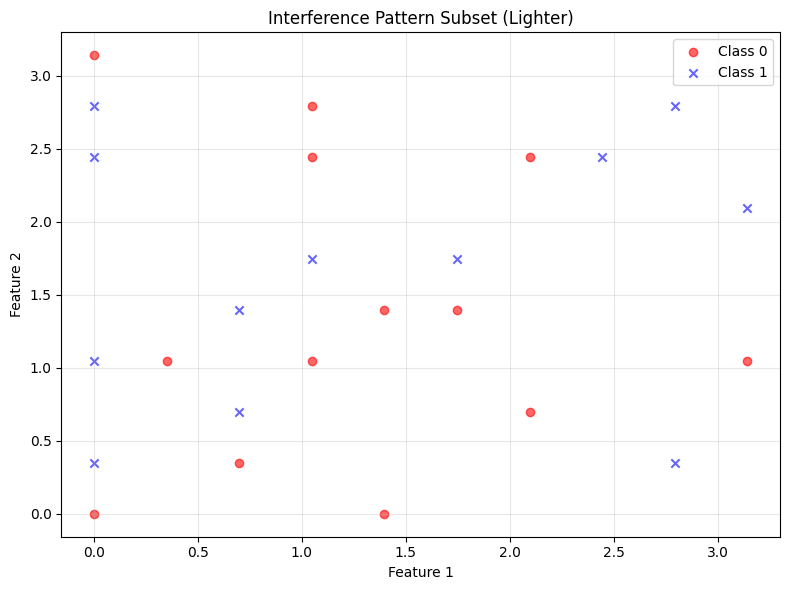


Kernel Instance: 2Q data (Fidelity based).

--- Classical SVM with RBF Kernel (Scikit-learn - Tuned) ---
Best Tuned RBF SVM accuracy: 0.4444 with params {'C': 200.0, 'gamma': 0.1}
Tuned Classical SVM (RBF) Accuracy: 0.4444 (Params: {'C': 200.0, 'gamma': 0.1}, Time: 0.55s)

--- Computing Fidelity Matrices on AerSimulator ---
Aer FidMat Comp Time: 79.96s
F_train_aer shape: (16, 16) ; F_test_aer shape: (9, 16)


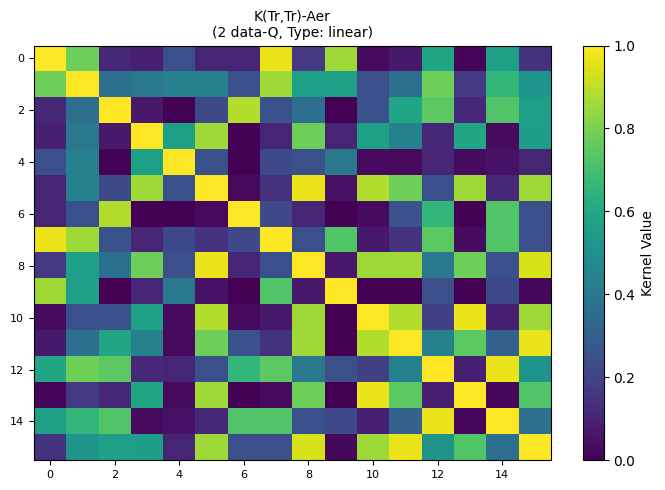

Quantum SVM (Aer, linear) Accuracy: 0.3333


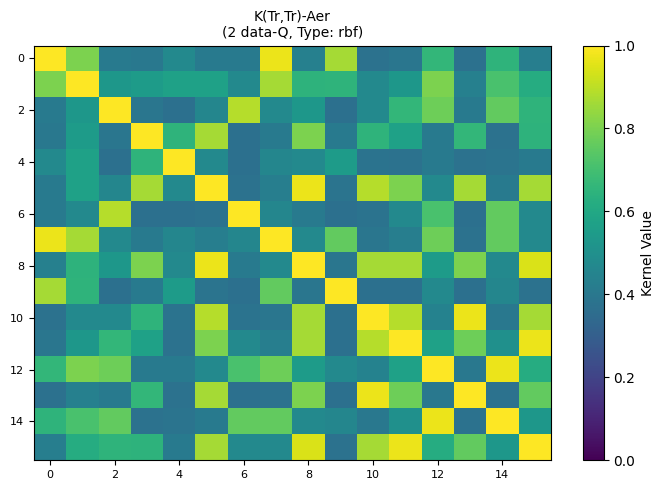

Quantum SVM (Aer, rbf) Accuracy: 0.3333


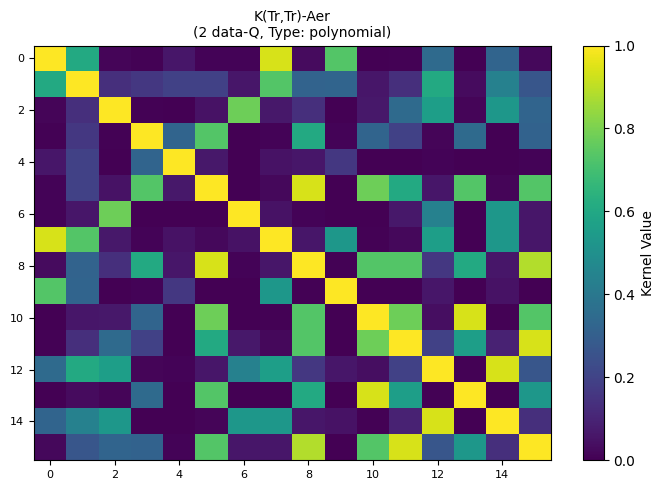

Quantum SVM (Aer, polynomial) Accuracy: 0.3333

--- Computing Fidelity Matrices on QPU: ibm_brisbane ---
Sampler opts:{'dynamical_decoupling': {'enable': True, 'sequence_type': 'XX'}, 'twirling': {'enable_gates': True, 'enable_measure': True}}

F_train_qpu (X_train(16))...
FidMat QPU (2Q): Gen&Transpile for 16x16 matrix...
Transpiling 120 fid circs...
Submitting 120 PUBs...
Fid JobID:d0mc0chcd8w0008sfxc0 submitted. Wait...
Fid job done.
F_train_qpu computed. Shape: (16, 16)

F_test_qpu (X_test(9), X_train(16))...
FidMat QPU (2Q): Gen&Transpile for 9x16 matrix...
Transpiling 144 fid circs...
Submitting 144 PUBs...
Fid JobID:d0mc154cd8w0008sfxh0 submitted. Wait...
Fid job done.
F_test_qpu computed. Shape: (9, 16)
QPU Kernel Computation Wall Time: 220.45s
--- QPU Fidelity Matrix Computation Complete ---

--- Testing Quantum Kernel Type: linear (QPU) ---


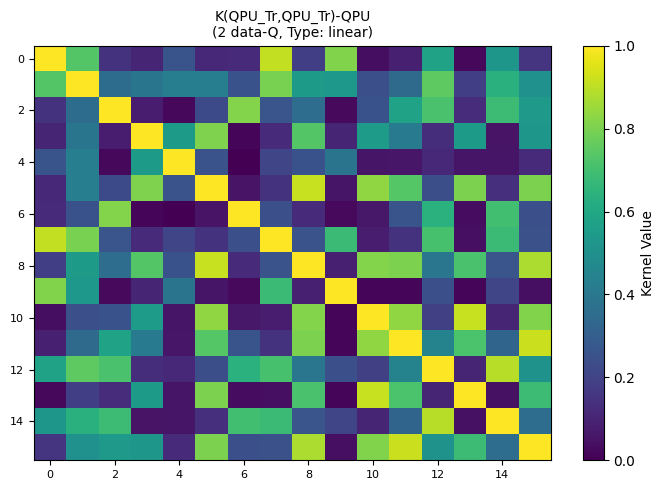

Quantum SVM (QPU,linear) Acc on test set: 0.3333

--- Testing Quantum Kernel Type: rbf (QPU) ---


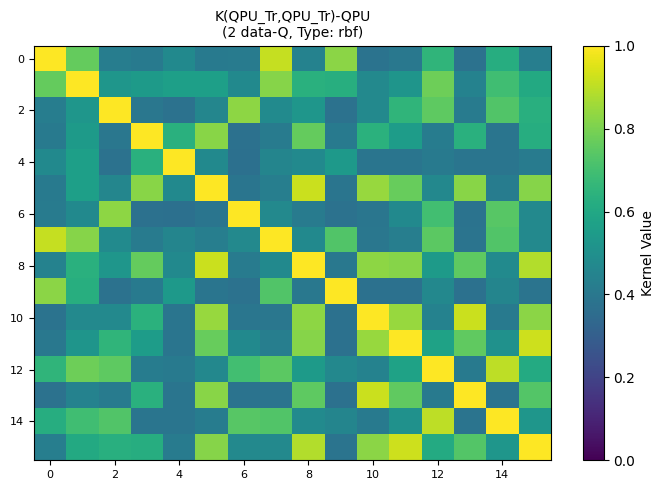

Quantum SVM (QPU,rbf) Acc on test set: 0.3333

--- Testing Quantum Kernel Type: polynomial (QPU) ---


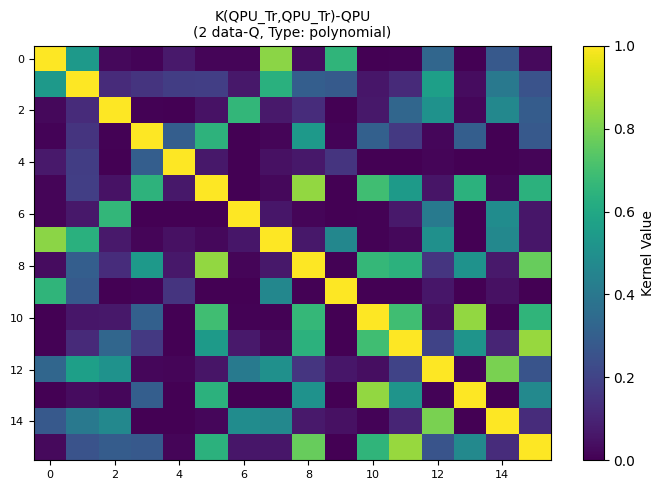

Quantum SVM (QPU,polynomial) Acc on test set: 0.3333


--- SVM Accuracy & Timing Summary ---
--------------------------------------------------------------------------
Kernel Type            | Source     | Accuracy   | Test N  | Comp Time (s)  
--------------------------------------------------------------------------
Classical RBF Tuned    | Sklearn    | 0.4444   | 9       | 0.55 (SVM only)
QK linear              | Aer        | 0.3333   | 9       | 79.96
QK rbf                 | Aer        | 0.3333   | 9       | (see above)
QK polynomial          | Aer        | 0.3333   | 9       | (see above)
QK linear              | QPU        | 0.3333   | 9       | 220.4472568299998
QK rbf                 | QPU        | 0.3333   | 9       | (see above)
QK polynomial          | QPU        | 0.3333   | 9       | (see above)
--------------------------------------------------------------------------
QPU Train Kernel Job IDs: d0mc0chcd8w0008sfxc0
QPU Test Kernel Job IDs : d0mc154cd8w0008sfxh0
Note: QPU 

In [ ]:
import qiskit
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
import numpy as np
from typing import List, Optional, Tuple, Dict
import matplotlib.pyplot as plt
import time
import os

# Scikit-learn imports
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# Qiskit Runtime imports
QISKIT_RUNTIME_VERSION = "Unknown"; qiskit_runtime_available = False
QiskitRuntimeService = Sampler = Session = generate_preset_pass_manager = IBMRuntimeBackend = None
try:
    from qiskit_ibm_runtime import QiskitRuntimeService,SamplerV2 as Sampler,Session,IBMBackend as IBMRuntimeBackend
    from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
    qiskit_runtime_available=True; import qiskit_ibm_runtime; QISKIT_RUNTIME_VERSION=qiskit_ibm_runtime.__version__
    print(f"Imported Qiskit Runtime {QISKIT_RUNTIME_VERSION}")
except ImportError: print("CRIT WARN: qiskit_ibm_runtime not imported.")
print(f"Qiskit (Terra) version: {qiskit.__version__}")

# --- Dataset Generation Functions ---
def plot_dataset_func(X, y, title): # Renamed
    plt.figure(figsize=(8, 6)) # ... (identical plotting helper)
    plt.scatter(X[y==0][:,0],X[y==0][:,1],color='red',marker='o',label='Class 0',alpha=0.6)
    plt.scatter(X[y==1][:,0],X[y==1][:,1],color='blue',marker='x',label='Class 1',alpha=0.6)
    plt.title(title);plt.xlabel('Feature 1');plt.ylabel('Feature 2');plt.legend();plt.grid(True,alpha=0.3);plt.tight_layout()
    return plt
def generate_quantum_interference_dataset(n_samples=121, noise_level=0.07, wave_freq=5.5, random_state=42): # Identical
    np.random.seed(random_state);approx_sqrt=int(np.ceil(np.sqrt(n_samples)));n_per_dim_x=approx_sqrt;n_per_dim_y=approx_sqrt
    if n_per_dim_x*(n_per_dim_y-1)>=n_samples:n_per_dim_y-=1
    x_coords=np.linspace(-3,3,n_per_dim_x);y_coords=np.linspace(-3,3,n_per_dim_y)
    xx,yy_mesh=np.meshgrid(x_coords,y_coords);X=np.column_stack([xx.ravel(),yy_mesh.ravel()])
    if X.shape[0]>n_samples:X=X[:n_samples,:]
    sources=[[-2.,0.],[-1.,0.],[0.,0.],[1.,0.],[2.,0.]];wave=np.zeros(X.shape[0])
    for s in sources:dist=np.sqrt((X[:,0]-s[0])**2+(X[:,1]-s[1])**2);wave+=np.sin(wave_freq*dist)/(1+0.2*dist)
    y_lbls=(wave>0).astype(int) # Renamed y_labels to y_lbls
    if noise_level>0 and len(y_lbls)>0:n_idx=np.random.choice(len(y_lbls),size=int(noise_level*len(y_lbls)),replace=False);y_lbls[n_idx]=1-y_lbls[n_idx]
    return X,y_lbls
def evaluate_rbf_svm_tuned(X_train, y_train, X_test, y_test, C_values=None, gamma_values=None): # Identical
    if C_values is None:C_values=[0.1,1.0,10.0,100.0,200.0]
    if gamma_values is None:gamma_values=[0.01,0.1,1.0,10.0,'scale','auto']
    param_grid={'C':C_values,'gamma':gamma_values};gs=GridSearchCV(SVC(kernel='rbf',random_state=42),param_grid,cv=min(3, X_train.shape[0] // 2 if X_train.shape[0] > 5 else 2),scoring='accuracy') # Adjusted CV
    gs.fit(X_train,y_train);best_svm=gs.best_estimator_;y_pred=best_svm.predict(X_test);best_score=accuracy_score(y_test,y_pred)
    print(f"Best Tuned RBF SVM accuracy: {best_score:.4f} with params {gs.best_params_}")
    return best_score,gs.best_params_,best_svm

# --- QuantumKernelQPUAdapt Class (Identical) ---
class QuantumKernelQPUAdapt:
    def __init__(self,n_data_qubits:int):self.n_data_qubits=n_data_qubits;self.aer_simulator=AerSimulator(method='statevector')
    def create_feature_map_circuit(self,x,name_suffix=""): # ...
        if x.ndim!=1:raise ValueError(f"x must be 1D, got {x.shape}")
        qr=QuantumRegister(self.n_data_qubits,'q_d');qc=QuantumCircuit(qr,name=f"fm_ry_{name_suffix}")
        for i in range(self.n_data_qubits):
            if i<len(x):qc.ry(x[i],qr[i])
        return qc
    def get_statevector_aer(self,x): # ...
        c=self.create_feature_map_circuit(x);c.save_statevector()
        tc=transpile(c,self.aer_simulator,optimization_level=0);r=self.aer_simulator.run(tc).result()
        return r.get_statevector(c).data
    def kernel_entry_aer(self,x1,x2): # ...
        s1,s2=self.get_statevector_aer(x1),self.get_statevector_aer(x2)
        return np.abs(np.vdot(s1,s2))**2
    def _construct_fidelity_circuit(self,x1,x2): # ...
        qc1=self.create_feature_map_circuit(x1,"x1");qc2=self.create_feature_map_circuit(x2,"x2")
        qc2d=qc2.inverse();qr_d=qc1.qregs[0];crn="c_fid"
        cr_d=ClassicalRegister(self.n_data_qubits,crn)
        fqc=QuantumCircuit(qr_d,cr_d,name=f"fid_{time.time_ns()}");fqc.append(qc1.to_instruction(),qr_d);fqc.append(qc2d.to_instruction(),qr_d)
        fqc.measure(qr_d,cr_d)
        return fqc,cr_d.name
    def _overlap_sq_qpu(self,x1,x2,sampler_instance_arg,qpu_backend_arg,shots_arg): # ...
        fidelity_qc,cr_name_in_circuit=self._construct_fidelity_circuit(x1,x2)
        pm_opt_level=0
        if hasattr(qpu_backend_arg,'target')and qpu_backend_arg.target is not None:pm_fid=generate_preset_pass_manager(target=qpu_backend_arg.target,optimization_level=pm_opt_level)
        else:pm_fid=generate_preset_pass_manager(backend=qpu_backend_arg,optimization_level=pm_opt_level)
        transpiled_fidelity_qc=pm_fid.run(fidelity_qc)
        job=sampler_instance_arg.run([(transpiled_fidelity_qc,)],shots=shots_arg);result=job.result();overlap_sq_val=0.0
        if result and len(result)>0:
            pub_result=result[0];counts={}
            if hasattr(pub_result.data,cr_name_in_circuit):counts=getattr(pub_result.data,cr_name_in_circuit).get_counts()
            elif hasattr(pub_result.data,'meas'):counts=pub_result.data.meas.get_counts()
            if not counts:print(f"W:No counts({cr_name_in_circuit}/meas).Fields:{dir(pub_result.data)}")
            else:prob_0=counts.get('0'*self.n_data_qubits,0)/shots_arg;overlap_sq_val=prob_0
        else:print(f"E:QPU job kernel entry fail {x1}v{x2}")
        return overlap_sq_val
    def compute_fidelity_matrix(self,X_left_data,X_right_data=None,use_qpu=False, # ... (Identical)
                                sampler_instance=None,qpu_backend=None,shots_per_entry=1024):
        n_left=X_left_data.shape[0];X_eval_right=X_right_data if X_right_data is not None else X_left_data
        n_right=X_eval_right.shape[0];is_sym=(X_right_data is None)or(np.array_equal(X_left_data,X_eval_right)and X_left_data.shape==X_eval_right.shape)
        fidelity_matrix=np.zeros((n_left,n_right));qpu_job_ids=[]
        if not use_qpu:
            for i in range(n_left):
                sj=i if is_sym else 0;
                for j in range(sj,n_right):
                    if is_sym and i==j:val=1.0
                    else:val=self.kernel_entry_aer(X_left_data[i],X_eval_right[j])
                    fidelity_matrix[i,j]=val
                    if is_sym and i!=j:fidelity_matrix[j,i]=val
            return fidelity_matrix,[]
        if sampler_instance is None or qpu_backend is None:raise ValueError("Sampler & QPU backend needed.")
        print(f"FidMat QPU ({self.n_data_qubits}Q): Gen&Transpile for {n_left}x{n_right} matrix...")
        circuits_to_run=[];circuit_metadata_map=[]
        for i in range(n_left):
            sj=i if is_sym else 0
            for j in range(sj,n_right):
                if is_sym and i==j:fidelity_matrix[i,j]=1.0;
                else:fqc,crn=self._construct_fidelity_circuit(X_left_data[i],X_eval_right[j]);circuits_to_run.append(fqc);circuit_metadata_map.append({'ij':(i,j),'crn':crn})
        if not circuits_to_run:
            if is_sym:np.fill_diagonal(fidelity_matrix,1.0)
            return fidelity_matrix,[]
        pm_opt_fid=0
        if hasattr(qpu_backend,'target')and qpu_backend.target is not None:pm=generate_preset_pass_manager(target=qpu_backend.target,optimization_level=pm_opt_fid)
        else:pm=generate_preset_pass_manager(backend=qpu_backend,optimization_level=pm_opt_fid)
        print(f"Transpiling {len(circuits_to_run)} fid circs...");t_fqcs=pm.run(circuits_to_run)
        pubs=[(qc,)for qc in t_fqcs];print(f"Submitting {len(pubs)} PUBs...");job=sampler_instance.run(pubs,shots=shots_per_entry)
        job_id_fid=job.job_id();qpu_job_ids.append(job_id_fid);print(f"Fid JobID:{job_id_fid} submitted. Wait...");result=job.result();print("Fid job done.")
        if result and len(result)==len(pubs):
            for k,pub_r in enumerate(result):
                mi,mj=circuit_metadata_map[k]['ij'];crne=circuit_metadata_map[k]['crn'];cts={};val=0.0
                if hasattr(pub_r.data,crne):cts=getattr(pub_r.data,crne).get_counts()
                elif hasattr(pub_r.data,'meas'):cts=pub_r.data.meas.get_counts()
                if not cts:print(f"W:No counts K({mi},{mj}).Data:{dir(pub_r.data)}")
                else:p0=cts.get('0'*self.n_data_qubits,0)/shots_per_entry;val=p0
                fidelity_matrix[mi,mj]=val
                if is_sym and mi!=mj:fidelity_matrix[mj,mi]=val
        else:print(f"E:QPU job fail/bad results.Exp{len(pubs)},got{len(result)if result else 0}.");fidelity_matrix.fill(np.nan)
        return fidelity_matrix,qpu_job_ids
    def visualize_kernel_matrix(self,K,title_prefix="Kernel Matrix",kernel_type_for_title="linear"): # Identical
        plt.figure(figsize=(7,5));plt.imshow(K,cmap='viridis',vmin=0,vmax=1,aspect='auto')
        plt.colorbar(label="Kernel Value");plt.title(title_prefix+f"\n({self.n_data_qubits} data-Q, Type: {kernel_type_for_title})",fontsize=10)
        plt.xticks(fontsize=8);plt.yticks(fontsize=8);plt.tight_layout();plt.show()

def transform_fidelity_matrix(fidelity_matrix, kernel_type, gamma=1.0, degree=2, offset=0.0): # Identical
    if kernel_type=='linear':return fidelity_matrix
    elif kernel_type=='rbf':return np.exp(-gamma*(1.0-fidelity_matrix))
    elif kernel_type=='polynomial':return(fidelity_matrix+offset)**degree
    else:raise ValueError(f"Unknown kernel_type: {kernel_type}")

# --- IBM Quantum Setup ---
IBM_QUANTUM_TOKEN_DIRECT = '93f5e77f44c1da4a5d90ea9de1c6136c6b7f7aeca5ea0a1063e4a23ed25bb96f3cf22fe4ebff3246ab8cabd5beec16b75f8497c87d3897bff17bebb9f18a47ef'
IBM_QUANTUM_CHANNEL_DIRECT = 'ibm_quantum'; IBM_QUANTUM_INSTANCE_DIRECT = 'ibm-q/open/main'; QPU_BACKEND_NAME = 'ibm_brisbane'
service=None; qpu_backend_for_kernel=None # ... (Service init condensed)
if qiskit_runtime_available:
    try: service=QiskitRuntimeService(channel=IBM_QUANTUM_CHANNEL_DIRECT,instance=IBM_QUANTUM_INSTANCE_DIRECT,token=IBM_QUANTUM_TOKEN_DIRECT); print("Service init.")
    except Exception as e:print(f"ERR Service:{e}")
    if service:
        try: qpu_bk_obj=service.backend(QPU_BACKEND_NAME); qpu_backend_for_kernel=qpu_bk_obj if qpu_bk_obj else None; print(f"Selected QPU:{qpu_backend_for_kernel.name}({qpu_backend_for_kernel.status().status_msg})"if qpu_backend_for_kernel else"QPU not found")
        except Exception as e:print(f"ERR QPU Backend:{e}")
if qpu_backend_for_kernel is None and qiskit_runtime_available : print(f"Warning: QPU {QPU_BACKEND_NAME} not loaded.")

# --- Main Execution Block ---
if __name__ == "__main__":
    print("\n=== Quantum Kernel SVM (Interference Dataset - Lighter Run) ===")
    RUN_QPU_PART = True
    PLOT_KERNEL_MATRICES = True
    PLOT_DATASET_VIS = True
    PLOT_DECISION_BOUNDARIES = False

    # --- LIGHTER Dataset parameters ---
    N_SAMPLES_INTERFERENCE_RAW = 100 # Generate fewer raw points
    INTERFERENCE_NOISE = 0.06        # Slightly less noise than "harder" version
    INTERFERENCE_WAVE_FREQ = 5.3     # Slightly different frequency
    N_FEATURES_DATA = 2

    # Use a smaller total subset for all methods for this "lighter" run
    N_TOTAL_SAMPLES_TO_USE = 25 # Reduced from 60/70

    X_generated, y_generated = generate_quantum_interference_dataset(
        n_samples=N_SAMPLES_INTERFERENCE_RAW, noise_level=INTERFERENCE_NOISE,
        wave_freq=INTERFERENCE_WAVE_FREQ, random_state=42)
    scaler = MinMaxScaler(feature_range=(0, np.pi)); X_data_scaled = scaler.fit_transform(X_generated)

    indices = np.arange(X_data_scaled.shape[0]); np.random.seed(42); np.random.shuffle(indices)
    X_subset_for_all = X_data_scaled[indices[:N_TOTAL_SAMPLES_TO_USE]] # Corrected variable name
    y_subset_for_all = y_generated[indices[:N_TOTAL_SAMPLES_TO_USE]]   # Corrected variable name

    # Single train/test split used by ALL methods for fair comparison on this small dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X_subset_for_all, y_subset_for_all, test_size=0.33, random_state=123, stratify=y_subset_for_all
    )
    print(f"Dataset Used by ALL methods: {X_train.shape[0]} train, {X_test.shape[0]} test ({X_train.shape[1]} features).")

    if PLOT_DATASET_VIS :
        plot_dataset_func(X_subset_for_all, y_subset_for_all, "Interference Pattern Subset (Lighter)")
        plt.show()

    num_qubits_for_kernel = N_FEATURES_DATA
    qkernel_instance = QuantumKernelQPUAdapt(n_data_qubits=num_qubits_for_kernel)
    print(f"\nKernel Instance: {qkernel_instance.n_data_qubits}Q data (Fidelity based).")

    results_log = []
    timing_results = {}
    qpu_job_ids_train_kernel, qpu_job_ids_test_kernel = [], []

    # --- Classical SVM Baseline ---
    print("\n--- Classical SVM with RBF Kernel (Scikit-learn - Tuned) ---")
    classical_start_time = time.perf_counter()
    accuracy_classical_rbf, best_params_classical, _ = evaluate_rbf_svm_tuned(
        X_train, y_train, X_test, y_test # Uses the small train/test split
    )
    classical_end_time = time.perf_counter()
    timing_results['classical_svm_tuned_time'] = classical_end_time - classical_start_time
    print(f"Tuned Classical SVM (RBF) Accuracy: {accuracy_classical_rbf:.4f} (Params: {best_params_classical}, Time: {timing_results['classical_svm_tuned_time']:.2f}s)")
    results_log.append({'kernel':'Classical RBF Tuned','source':'Sklearn','accuracy':accuracy_classical_rbf,'test_set_size':X_test.shape[0]})

    # --- Aer Quantum Kernels ---
    print("\n--- Computing Fidelity Matrices on AerSimulator ---")
    aer_time_start = time.perf_counter()
    F_train_aer, _ = qkernel_instance.compute_fidelity_matrix(X_train) # Uses small X_train
    F_test_aer, _  = qkernel_instance.compute_fidelity_matrix(X_test, X_train) # Uses small X_test, X_train
    aer_time_end = time.perf_counter()
    timing_results['aer_kernel_computation_time'] = aer_time_end - aer_time_start
    print(f"Aer FidMat Comp Time: {timing_results['aer_kernel_computation_time']:.2f}s")
    print("F_train_aer shape:",F_train_aer.shape,"; F_test_aer shape:",F_test_aer.shape)
    kernel_types_to_test = ['linear', 'rbf', 'polynomial']
    for k_type in kernel_types_to_test:
        K_tr_aer_t=transform_fidelity_matrix(F_train_aer,k_type); K_te_aer_t=transform_fidelity_matrix(F_test_aer,k_type)
        if PLOT_KERNEL_MATRICES: qkernel_instance.visualize_kernel_matrix(K_tr_aer_t,f"K(Tr,Tr)-Aer",k_type)
        svm_aer=SVC(kernel='precomputed',C=1.0,random_state=42); svm_aer.fit(K_tr_aer_t,y_train)
        y_pred_aer=svm_aer.predict(K_te_aer_t); acc_aer=accuracy_score(y_test,y_pred_aer)
        print(f"Quantum SVM (Aer, {k_type}) Accuracy: {acc_aer:.4f}")
        results_log.append({'kernel':f"QK {k_type}",'source':'Aer','accuracy':acc_aer,'test_set_size':X_test.shape[0]})

    # --- QPU Quantum Kernels ---
    F_train_qpu, F_test_qpu = None, None
    qpu_wall_time_kernel = 0
    qpu_ready = qpu_backend_for_kernel and hasattr(qpu_backend_for_kernel,'status') and qpu_backend_for_kernel.status().operational
    if RUN_QPU_PART and qpu_ready and qiskit_runtime_available:
        print(f"\n--- Computing Fidelity Matrices on QPU: {qpu_backend_for_kernel.name} ---")
        shots_qpu = 2048 # Can adjust shots
        samp_opts = {"dynamical_decoupling":{"enable":True,"sequence_type":"XX"}, "twirling":{"enable_gates":True,"enable_measure":True}}
        print(f"Sampler opts:{samp_opts}")
        qpu_overall_start_time = time.perf_counter()
        with Session(backend=qpu_backend_for_kernel) as session:
            sampler_qpu = Sampler(options=samp_opts)
            print(f"\nF_train_qpu (X_train({X_train.shape[0]}))...") # Using X_train directly
            F_train_qpu, job_ids_tr = qkernel_instance.compute_fidelity_matrix(X_train, use_qpu=True,
                sampler_instance=sampler_qpu, qpu_backend=qpu_backend_for_kernel, shots_per_entry=shots_qpu)
            qpu_job_ids_train_kernel.extend(job_ids_tr)
            if F_train_qpu is not None and not np.isnan(F_train_qpu).all(): print("F_train_qpu computed. Shape:",F_train_qpu.shape)
            else: print("F_train_qpu failed/NaNs.")

            if X_test.shape[0]>0 and F_train_qpu is not None and not np.isnan(F_train_qpu).all():
                print(f"\nF_test_qpu (X_test({X_test.shape[0]}), X_train({X_train.shape[0]}))...")
                F_test_qpu, job_ids_te = qkernel_instance.compute_fidelity_matrix(X_test,X_train,use_qpu=True,
                    sampler_instance=sampler_qpu,qpu_backend=qpu_backend_for_kernel,shots_per_entry=shots_qpu)
                qpu_job_ids_test_kernel.extend(job_ids_te)
                if F_test_qpu is not None and not np.isnan(F_test_qpu).all(): print("F_test_qpu computed. Shape:",F_test_qpu.shape)
                else: print("F_test_qpu failed/NaNs.")
        qpu_wall_time_kernel = time.perf_counter() - qpu_overall_start_time
        timing_results['qpu_kernel_wall_time'] = qpu_wall_time_kernel
        print(f"QPU Kernel Computation Wall Time: {timing_results['qpu_kernel_wall_time']:.2f}s")
        print("--- QPU Fidelity Matrix Computation Complete ---")

        if F_train_qpu is not None and F_test_qpu is not None and not np.isnan(F_train_qpu).any() and not np.isnan(F_test_qpu).any():
            for k_type in kernel_types_to_test: # ... (SVM training with QPU kernels)
                print(f"\n--- Testing Quantum Kernel Type: {k_type} (QPU) ---")
                K_tr_qpu_t=transform_fidelity_matrix(F_train_qpu,k_type); K_te_qpu_t=transform_fidelity_matrix(F_test_qpu,k_type)
                if PLOT_KERNEL_MATRICES: qkernel_instance.visualize_kernel_matrix(K_tr_qpu_t,f"K(QPU_Tr,QPU_Tr)-QPU",k_type)
                svm_qpu=SVC(kernel='precomputed',C=1.0,random_state=42); svm_qpu.fit(K_tr_qpu_t,y_train) # Use same y_train
                y_pred_qpu=svm_qpu.predict(K_te_qpu_t); acc_qpu=accuracy_score(y_test,y_pred_qpu) # Use same y_test
                print(f"Quantum SVM (QPU,{k_type}) Acc on test set: {acc_qpu:.4f}")
                results_log.append({'kernel':f"QK {k_type}",'source':'QPU','accuracy':acc_qpu,'test_set_size':X_test.shape[0]})
        else: print("QPU fidelity matrices not suitable for SVM.")
    # ... (Rest of the script for summary and final prints) ...
    elif RUN_QPU_PART: print(f"\nQPU {QPU_BACKEND_NAME} not ready. Skipping QPU part.")
    else: print ("\nRUN_QPU_PART flag is False. Skipping QPU part.")

    print("\n\n--- SVM Accuracy & Timing Summary ---")
    print("--------------------------------------------------------------------------")
    print(f"{'Kernel Type':<22} | {'Source':<10} | {'Accuracy':<10} | {'Test N':<7} | {'Comp Time (s)':<15}")
    print("--------------------------------------------------------------------------")
    classical_time_str = f"{timing_results.get('classical_svm_tuned_time', 0):.2f} (SVM only)"
    aer_time_str = f"{timing_results.get('aer_kernel_computation_time', 0):.2f}"
    qpu_time_str = f"{timing_results.get('qpu_kernel_wall_time', 'N/A')}"

    for res_item in results_log:
        comp_time = "N/A"
        if res_item['source'] == 'Sklearn': comp_time = classical_time_str
        elif res_item['source'] == 'Aer': comp_time = aer_time_str
        elif res_item['source'] == 'QPU': comp_time = qpu_time_str
        print(f"{res_item['kernel']:<22} | {res_item['source']:<10} | {res_item['accuracy']:.4f}   | {res_item.get('test_set_size','N/A'):<7} | {comp_time}")
        if res_item['source'] == 'Aer': aer_time_str = "(see above)" # Avoid repeating for each Aer kernel type
        if res_item['source'] == 'QPU': qpu_time_str = "(see above)" # Avoid repeating for each QPU kernel type

    print("--------------------------------------------------------------------------")
    if RUN_QPU_PART and qpu_ready:
        print(f"QPU Train Kernel Job IDs: {', '.join(qpu_job_ids_train_kernel) if qpu_job_ids_train_kernel else 'N/A'}")
        print(f"QPU Test Kernel Job IDs : {', '.join(qpu_job_ids_test_kernel) if qpu_job_ids_test_kernel else 'N/A'}")
        print(f"Note: QPU Wall Time includes circuit generation, transpilation, submission, queueing, execution, results.")
        print(f"      Actual QPU execution time (quantum time) per job is typically much shorter (check IBM Quantum dashboard).")


    if PLOT_DECISION_BOUNDARIES and N_FEATURES_DATA == 2: print("\nDecision boundary plotting...") # ... (Can re-add if needed)
    else: print("\nDecision boundary plotting skipped.")

    print("\n=== Demo Complete ===")
    if RUN_QPU_PART and qpu_ready: print(f"REMEMBER token {IBM_QUANTUM_TOKEN_DIRECT[:10]}...")